In [3]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
matches = pd.read_csv("cleaned_ipl_matches_v2.csv")
deliveries = pd.read_csv("cleaned_ipl_deliveries_v2.csv")

In [5]:
# Matches played and winning percentages
team_matches = pd.concat([matches['team1'], matches['team2']]).value_counts()
team_wins = matches['winner'].value_counts()
win_percentage = (team_wins / team_matches) * 100

C:\Users\SUBHAYAN\AppData\Local\Temp\ipykernel_12448\2215560630.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=team_stats.index, y=team_stats['Winning Percentage'], palette='viridis')


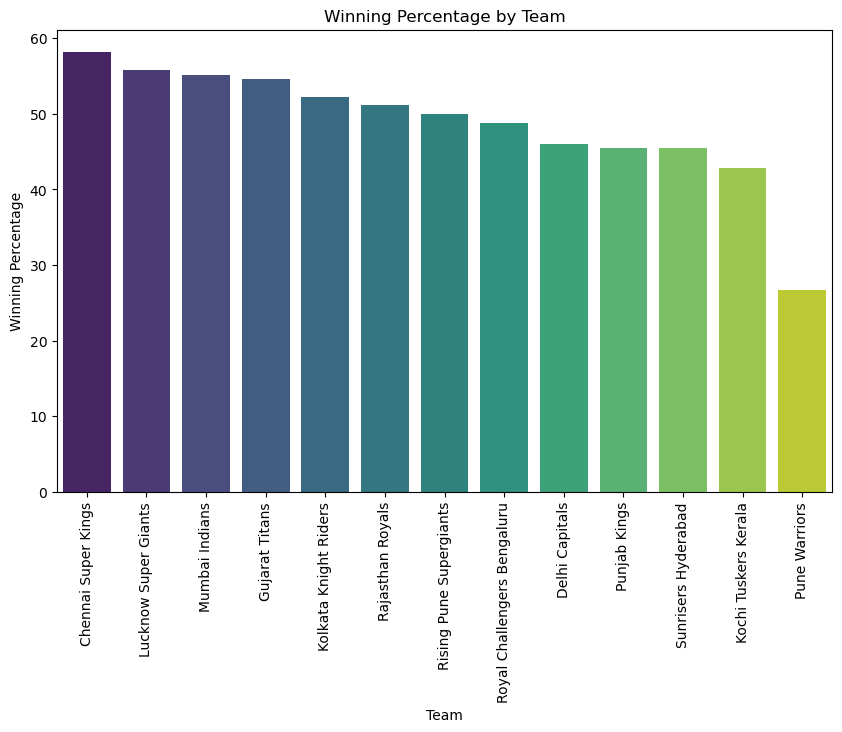

In [6]:

# Calculate matches played and winning percentages
matches_played = matches['team1'].value_counts() + matches['team2'].value_counts()
matches_won = matches['winner'].value_counts()
win_percentage = (matches_won / matches_played) * 100

# Create a DataFrame for visualization
team_stats = pd.DataFrame({
    'Matches Played': matches_played,
    'Winning Percentage': win_percentage
}).sort_values(by='Winning Percentage', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=team_stats.index, y=team_stats['Winning Percentage'], palette='viridis')
plt.title('Winning Percentage by Team')
plt.xlabel('Team')
plt.ylabel('Winning Percentage')
plt.xticks(rotation=90)
plt.show()

C:\Users\SUBHAYAN\AppData\Local\Temp\ipykernel_12448\3327700699.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=team_stats_sorted.index, y=team_stats_sorted['Matches Played'], palette='magma')


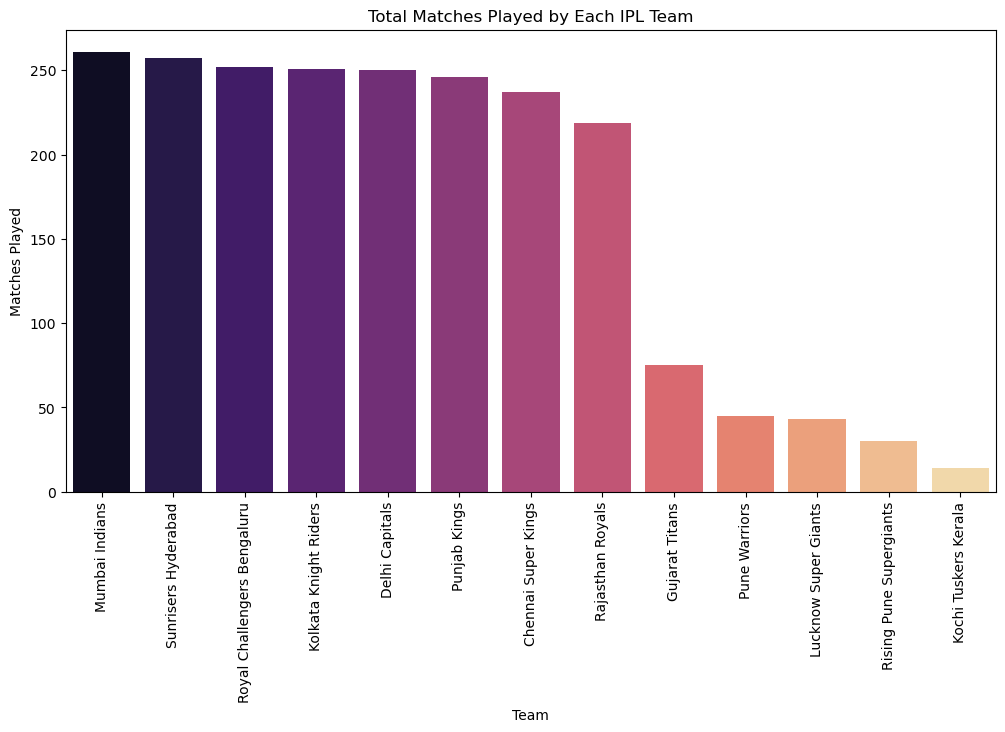

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sort teams by Matches Played in descending order
team_stats_sorted = team_stats.sort_values(by='Matches Played', ascending=False)

# Plot bar graph for Matches Played
plt.figure(figsize=(12, 6))
sns.barplot(x=team_stats_sorted.index, y=team_stats_sorted['Matches Played'], palette='magma')

# Labels and title
plt.xlabel("Team")
plt.ylabel("Matches Played")
plt.title("Total Matches Played by Each IPL Team")
plt.xticks(rotation=90)

# Show plot
plt.show()


C:\Users\SUBHAYAN\AppData\Local\Temp\ipykernel_25452\1732648449.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=team_stats.index, y=team_stats['Winning Percentage'], palette='viridis', ax=ax1)


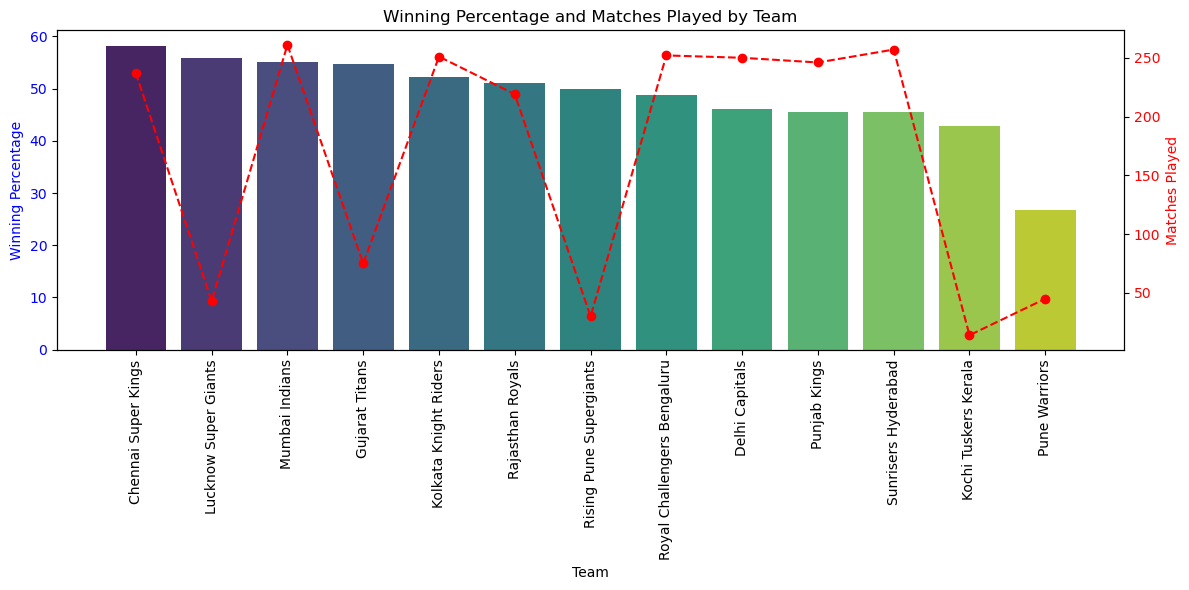

In [13]:

# Set figure size
fig, ax1 = plt.subplots(figsize=(12, 6))

# Bar plot for Winning Percentage
sns.barplot(x=team_stats.index, y=team_stats['Winning Percentage'], palette='viridis', ax=ax1)
ax1.set_xlabel("Team")
ax1.set_ylabel("Winning Percentage", color='blue')
ax1.set_title("Winning Percentage and Matches Played by Team")
ax1.tick_params(axis='y', labelcolor='blue')
plt.xticks(rotation=90)

# Create a second y-axis
ax2 = ax1.twinx()
ax2.plot(team_stats.index, team_stats['Matches Played'], color='red', marker='o', linestyle='dashed', label="Matches Played")
ax2.set_ylabel("Matches Played", color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Show plot with legend
fig.tight_layout()
plt.show()


                             Total Runs Conceded  Legitimate Balls   Overs  \
Royal Challengers Bengaluru                40801             28989  4831.5   
Kolkata Knight Riders                      39086             28680  4780.0   
Punjab Kings                               40006             28124  4687.3   
Chennai Super Kings                        37207             27533  4588.8   
Delhi Capitals                             40125             28871  4811.8   
Rajasthan Royals                           35142             25379  4229.8   
Mumbai Indians                             41296             30271  5045.2   
Sunrisers Hyderabad                        40721             29742  4957.0   
Kochi Tuskers Kerala                        1986              1555   259.2   
Pune Warriors                               6857              5311   885.2   
Rising Pune Supergiants                     4549              3420   570.0   
Gujarat Titans                             12565              85

C:\Users\SUBHAYAN\AppData\Local\Temp\ipykernel_12448\266518735.py:99: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Team', y='Rate Difference',
C:\Users\SUBHAYAN\AppData\Local\Temp\ipykernel_12448\266518735.py:99: UserWarning: 
The palette list has fewer values (1) than needed (13) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x='Team', y='Rate Difference',


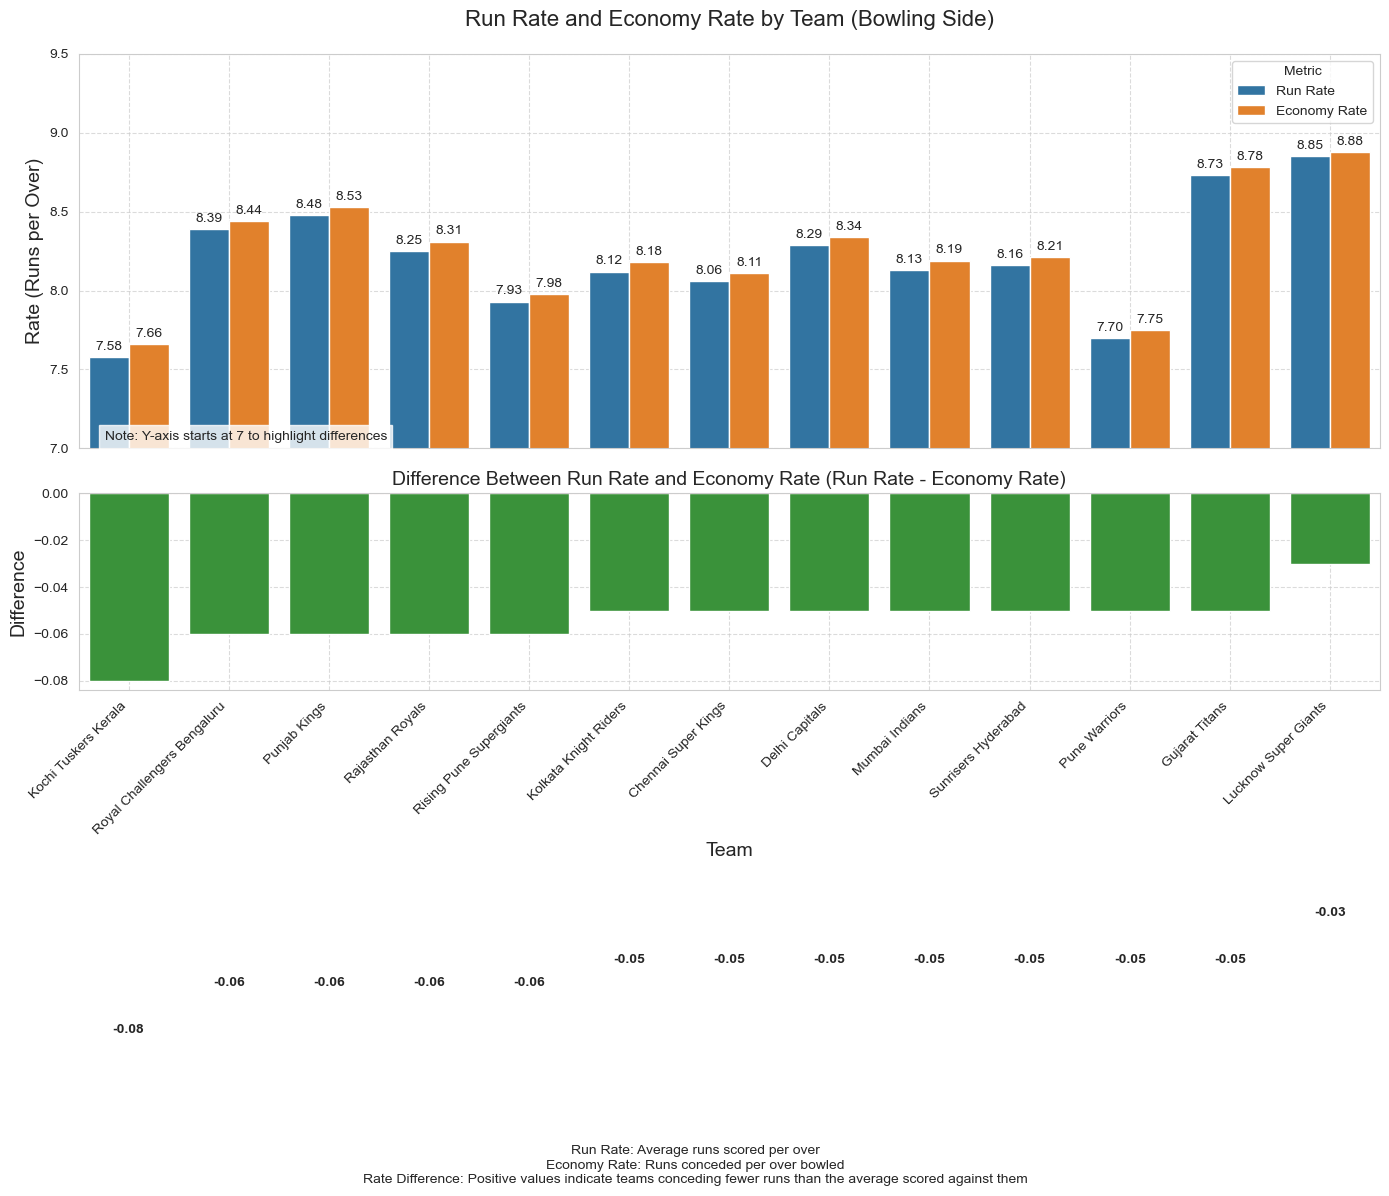

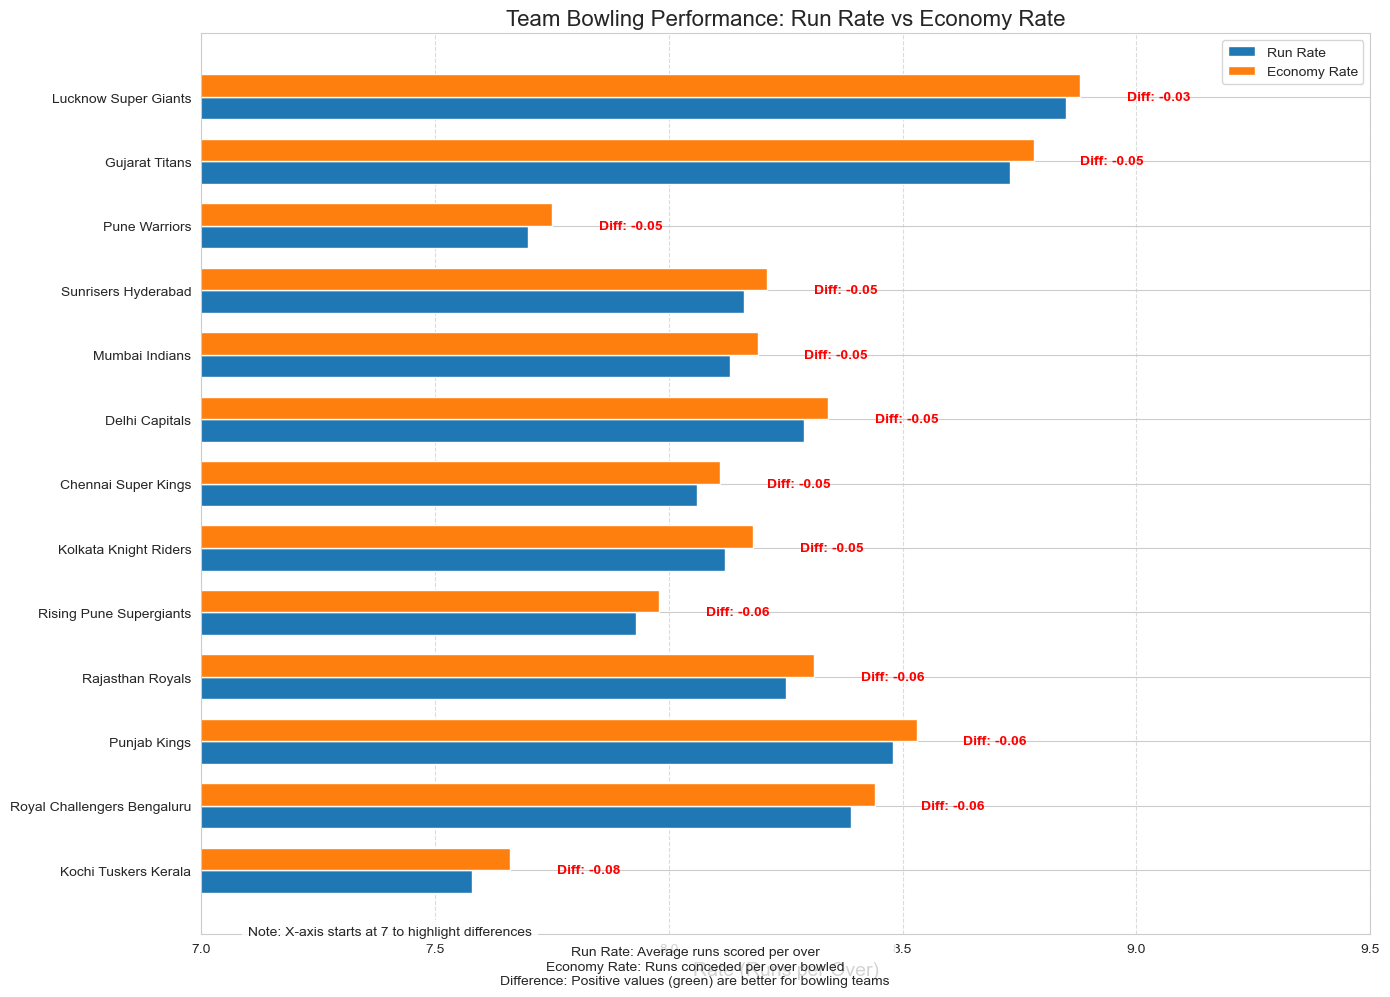

In [ ]:

def calculate_team_bowling_stats(df):
    """Calculate correct bowling statistics for each team"""
    # Group deliveries by bowling team
    team_stats = {}
    
    # Get unique bowling teams
    teams = df['bowling_team'].unique()
    
    for team in teams:
        # Filter deliveries for this team
        team_deliveries = df[df['bowling_team'] == team]
        
        # Calculate total runs conceded
        total_runs = team_deliveries['total_runs'].sum()
        
        # Calculate legitimate balls (excluding wides and no balls)
        # First, identify which extras are wides or no balls
        wides_noballs = team_deliveries[
            team_deliveries['extras_type'].isin(['wides', 'noballs'])
        ]
        legitimate_balls = len(team_deliveries) - len(wides_noballs)
        
        # Calculate overs (in cricket, 6 legitimate balls = 1 over)
        overs = legitimate_balls / 6
        
        # Economy Rate = Runs conceded / Overs bowled
        economy_rate = total_runs / overs if overs > 0 else 0
        
        # For run rate, we calculate average runs scored per over
        # Group by match and over
        over_groups = team_deliveries.groupby(['match_id', 'over'])
        runs_per_over = over_groups['total_runs'].sum()
        
        # Calculate average runs per over
        run_rate = runs_per_over.mean()
        
        # Calculate difference between rates (new metric)
        rate_difference = run_rate - economy_rate
        
        # Store the results
        team_stats[team] = {
            'Total Runs Conceded': total_runs,
            'Legitimate Balls': legitimate_balls,
            'Overs': round(overs, 1),
            'Economy Rate': round(economy_rate, 2),
            'Run Rate': round(run_rate, 2),
            'Rate Difference': round(rate_difference, 2)  # Store the difference
        }
    
    # Convert to DataFrame for easier plotting
    stats_df = pd.DataFrame.from_dict(team_stats, orient='index')
    return stats_df

# Calculate the statistics
bowling_stats = calculate_team_bowling_stats(deliveries)

# Print the statistics for verification
print(bowling_stats)

# Sort teams by Rate Difference for better visualization
bowling_stats = bowling_stats.sort_values(by='Rate Difference')

# Create a figure for plotting the rates separately with a shared x-axis
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 12), sharex=True, gridspec_kw={'height_ratios': [1, 0.5]})

# Plot the bar chart with both metrics side by side
bowling_stats_reset = bowling_stats.reset_index().rename(columns={'index': 'Team'})
bowling_stats_melted = pd.melt(bowling_stats_reset, 
                              id_vars=['Team'], 
                              value_vars=['Run Rate', 'Economy Rate'],
                              var_name='Metric', value_name='Rate')

# Use different colors and make the bars grouped
sns.set_style("whitegrid")
sns.barplot(x='Team', y='Rate', hue='Metric', 
           data=bowling_stats_melted, 
           palette=['#1f77b4', '#ff7f0e'],
           ax=ax1)

# Customize the first subplot
ax1.set_title('Run Rate and Economy Rate by Team (Bowling Side)', fontsize=16, pad=20)
ax1.set_xlabel('')  # Remove label since it's shared
ax1.set_ylabel('Rate (Runs per Over)', fontsize=14)
ax1.set_ylim(7, 9.5)  # Set a more focused y-range to highlight differences
ax1.legend(title='Metric')
ax1.grid(True, linestyle='--', alpha=0.7)

# Add text to indicate the scale is adjusted
ax1.text(0.02, 0.02, "Note: Y-axis starts at 7 to highlight differences", 
         transform=ax1.transAxes, fontsize=10, 
         bbox=dict(facecolor='white', alpha=0.8))

# Add the actual values on top of each bar
for container in ax1.containers:
    ax1.bar_label(container, fmt='%.2f', padding=3)

# Plot the difference as a bar chart in the second subplot
sns.barplot(x='Team', y='Rate Difference', 
           data=bowling_stats_reset,
           palette=['#2ca02c'],  # Green color
           ax=ax2)

# Customize the second subplot
ax2.set_title('Difference Between Run Rate and Economy Rate (Run Rate - Economy Rate)', fontsize=14)
ax2.set_xlabel('Team', fontsize=14)
ax2.set_ylabel('Difference', fontsize=14)
ax2.axhline(y=0, color='red', linestyle='-', alpha=0.3)  # Add a reference line at y=0
ax2.grid(True, linestyle='--', alpha=0.7)

# Add the actual values on top of each bar
for i, v in enumerate(bowling_stats['Rate Difference']):
    ax2.text(i, v + (0.01 if v >= 0 else -0.15), f"{v:.2f}", 
             ha='center', fontsize=10, fontweight='bold')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Add an explanation of the metrics
fig.text(0.5, 0.01, 
        "Run Rate: Average runs scored per over\nEconomy Rate: Runs conceded per over bowled\n"
        "Rate Difference: Positive values indicate teams conceding fewer runs than the average scored against them",
        ha='center', fontsize=10, bbox=dict(facecolor='white', alpha=0.8))

plt.tight_layout()
plt.savefig('improved_team_bowling_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

# Create a second visualization focusing on the actual values with a different approach
plt.figure(figsize=(14, 10))

# Create a sorted table-like visualization
teams = bowling_stats.index
run_rates = bowling_stats['Run Rate'].values
economy_rates = bowling_stats['Economy Rate'].values
differences = bowling_stats['Rate Difference'].values

# Create a horizontal bar chart sorted by the difference
sorted_indices = np.argsort(differences)
sorted_teams = [teams[i] for i in sorted_indices]
sorted_run_rates = [run_rates[i] for i in sorted_indices]
sorted_economy_rates = [economy_rates[i] for i in sorted_indices]
sorted_differences = [differences[i] for i in sorted_indices]

# Create horizontal bars for both metrics
y_pos = np.arange(len(sorted_teams))
bar_height = 0.35

plt.barh(y_pos - bar_height/2, sorted_run_rates, bar_height, color='#1f77b4', label='Run Rate')
plt.barh(y_pos + bar_height/2, sorted_economy_rates, bar_height, color='#ff7f0e', label='Economy Rate')

# Add the difference as text annotation
for i, (rr, er, diff) in enumerate(zip(sorted_run_rates, sorted_economy_rates, sorted_differences)):
    color = 'green' if diff >= 0 else 'red'
    plt.text(max(rr, er) + 0.1, i, f"Diff: {diff:.2f}", 
             va='center', fontsize=10, color=color, fontweight='bold')

# Customize the plot
plt.yticks(y_pos, sorted_teams)
plt.xlabel('Rate (Runs per Over)', fontsize=14)
plt.title('Team Bowling Performance: Run Rate vs Economy Rate', fontsize=16)
plt.grid(True, axis='x', linestyle='--', alpha=0.7)
plt.legend()

# Set x-axis to highlight the differences
plt.xlim(7, 9.5)  # Adjusted scale
plt.text(7.1, -1, "Note: X-axis starts at 7 to highlight differences", 
         fontsize=10, bbox=dict(facecolor='white', alpha=0.8))

# Add explanation of metrics
plt.figtext(0.5, 0.01, 
           "Run Rate: Average runs scored per over\n"
           "Economy Rate: Runs conceded per over bowled\n"
           "Difference: Positive values (green) are better for bowling teams",
           ha='center', fontsize=10, bbox=dict(facecolor='white', alpha=0.8))

plt.tight_layout()
plt.savefig('team_bowling_horizontal_comparison.png', dpi=300, bbox_inches='tight')
plt.show()


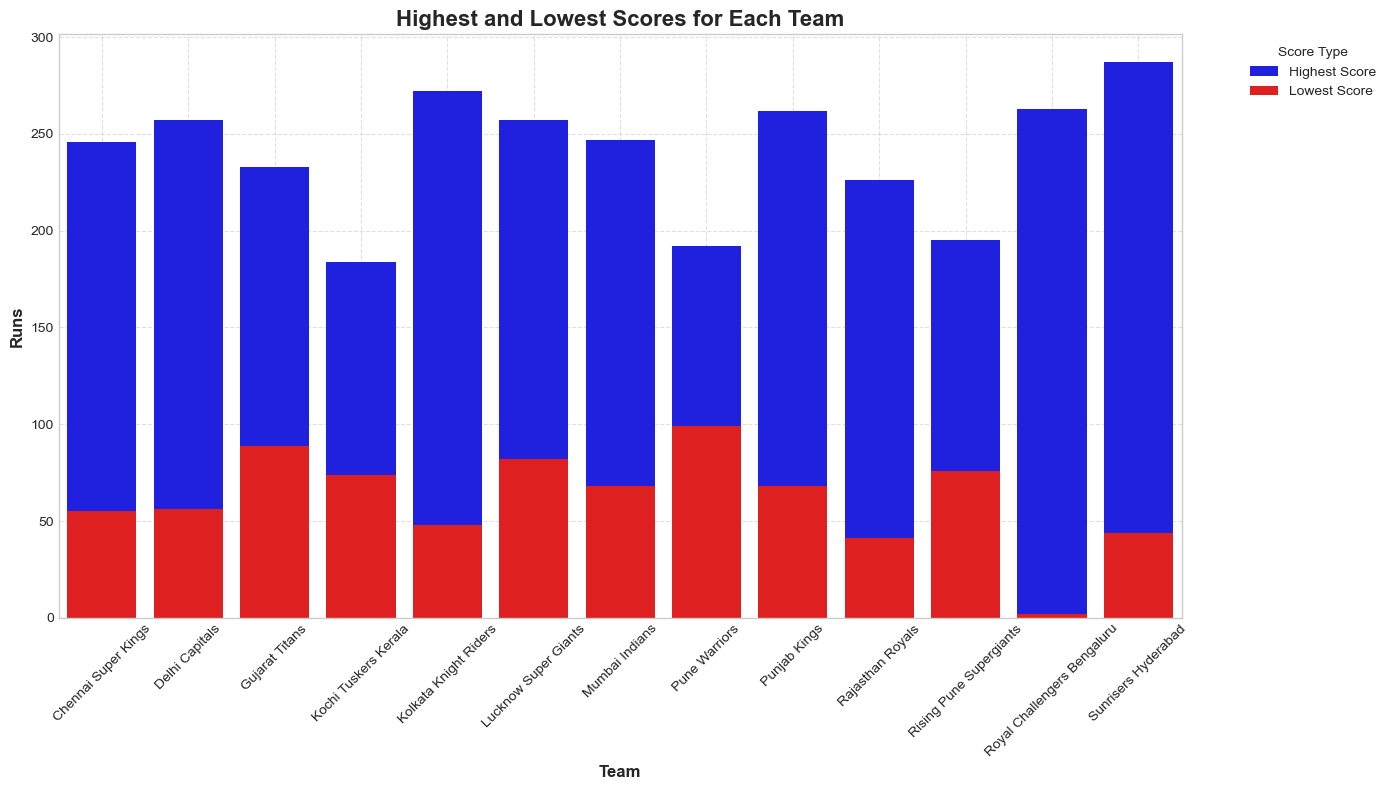

In [35]:

# Calculate total runs per team per match
team_match_runs = deliveries.groupby(['match_id', 'batting_team'])['total_runs'].sum().reset_index()

# Calculate highest and lowest scores for each team
highest_scores = team_match_runs.groupby('batting_team')['total_runs'].max().reset_index()
lowest_scores = team_match_runs.groupby('batting_team')['total_runs'].min().reset_index()

# Merge highest and lowest scores into one DataFrame
team_scores = pd.merge(highest_scores, lowest_scores, on='batting_team', suffixes=('_highest', '_lowest'))

# Plot
plt.figure(figsize=(14, 8))

# Plot highest scores
sns.barplot(data=team_scores, x='batting_team', y='total_runs_highest', color='blue', label='Highest Score')

# Plot lowest scores
sns.barplot(data=team_scores, x='batting_team', y='total_runs_lowest', color='red', label='Lowest Score')

# Add labels and titles
plt.title('Highest and Lowest Scores for Each Team', fontsize=16, fontweight='bold')
plt.xlabel('Team', fontsize=12, fontweight='bold')
plt.ylabel('Runs', fontsize=12, fontweight='bold')
plt.xticks(rotation=45)
plt.legend(title='Score Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

<Figure size 1200x600 with 0 Axes>

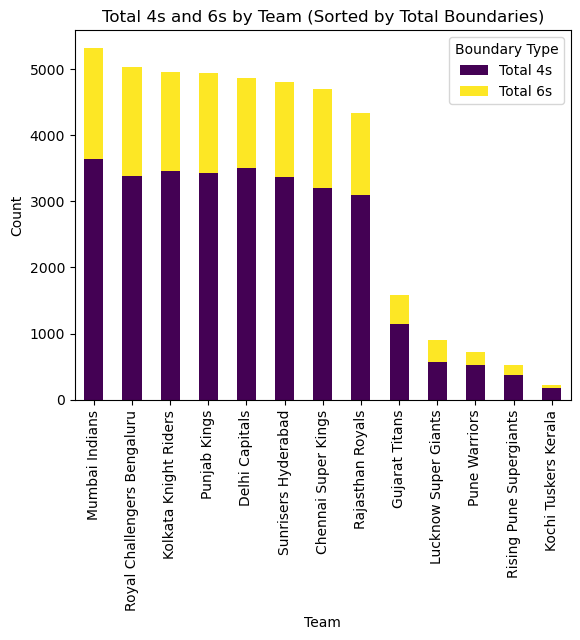

In [16]:

# Calculate total 4s and 6s
fours = deliveries[deliveries['batsman_runs'] == 4].groupby('batting_team').size()
sixes = deliveries[deliveries['batsman_runs'] == 6].groupby('batting_team').size()

# Create DataFrame and fill NaN values with 0
boundary_stats = pd.DataFrame({
    'Total 4s': fours,
    'Total 6s': sixes
}).fillna(0)

# Sort by total boundaries (4s + 6s) in descending order
boundary_stats['Total Boundaries'] = boundary_stats['Total 4s'] + boundary_stats['Total 6s']
boundary_stats = boundary_stats.sort_values(by='Total Boundaries', ascending=False).drop(columns=['Total Boundaries'])

# Plot the stacked bar chart
plt.figure(figsize=(12, 6))
boundary_stats.plot(kind='bar', stacked=True, colormap='viridis')

# Labels and title
plt.title('Total 4s and 6s by Team (Sorted by Total Boundaries)')
plt.xlabel('Team')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.legend(title='Boundary Type')

# Show plot
plt.show()


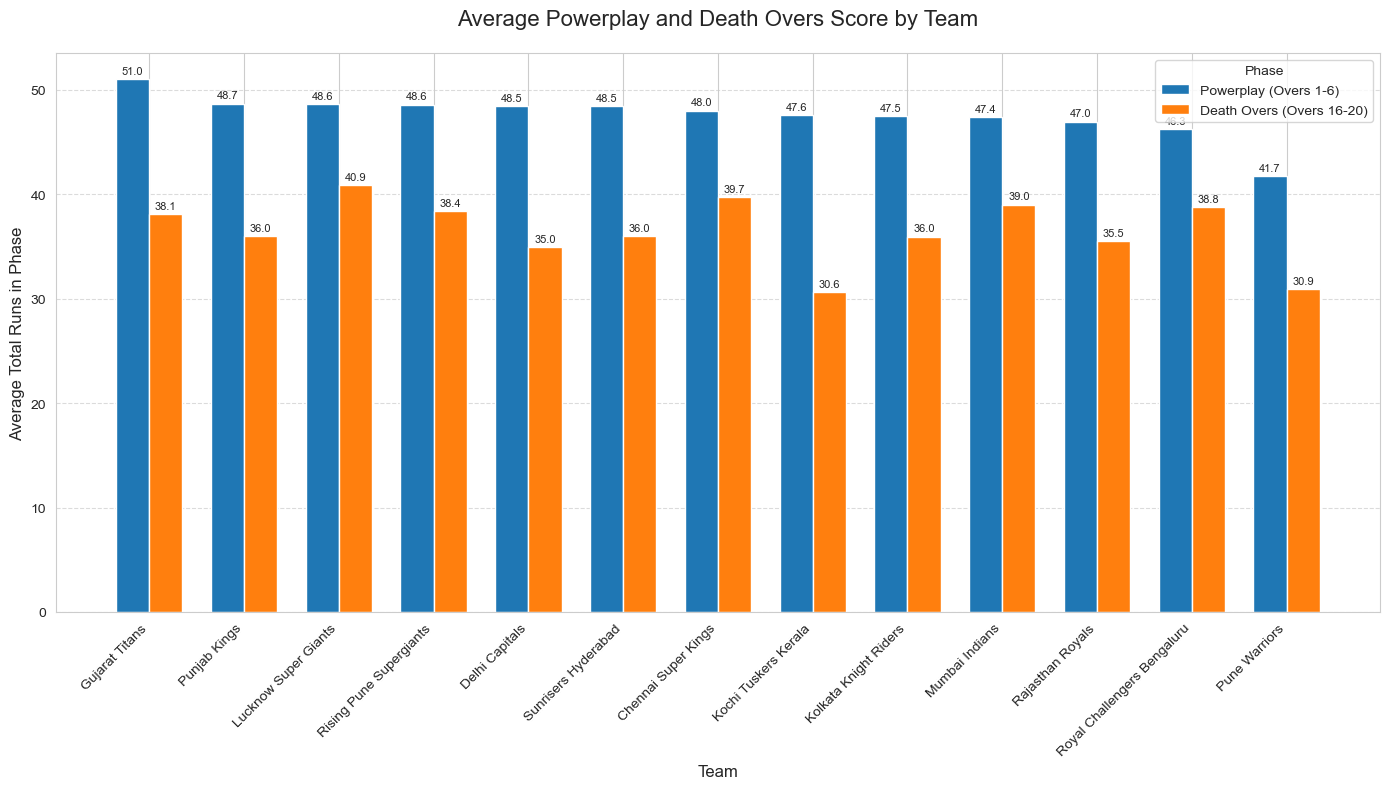

In [10]:
# Define powerplay (overs 1-6) and death overs (overs 16-20)
powerplay = deliveries[deliveries['over'].between(1, 6)]
death_overs = deliveries[deliveries['over'].between(16, 20)]

# Calculate total runs scored in Powerplay and Death Overs per match
powerplay_runs = powerplay.groupby(['batting_team', 'match_id'])['total_runs'].sum()
death_over_runs = death_overs.groupby(['batting_team', 'match_id'])['total_runs'].sum()

# Calculate average total runs for powerplay and death overs per team
avg_powerplay = powerplay_runs.groupby('batting_team').mean().round(2)
avg_death_overs = death_over_runs.groupby('batting_team').mean().round(2)

# Create DataFrame for visualization
overs_stats = pd.DataFrame({
    'Average Powerplay Score (Overs 1-6)': avg_powerplay,
    'Average Death Overs Score (Overs 16-20)': avg_death_overs
}).reset_index()

# Sort by powerplay score to make the visualization more interpretable
overs_stats = overs_stats.sort_values('Average Powerplay Score (Overs 1-6)', ascending=False)

# Set up the figure
plt.figure(figsize=(14, 8))
sns.set_style("whitegrid")

# Create a proper bar chart instead of line plot for better comparison
ax = plt.subplot(111)
bar_width = 0.35
x = np.arange(len(overs_stats['batting_team']))

# Plot bars side by side
powerplay_bars = ax.bar(x - bar_width/2, overs_stats['Average Powerplay Score (Overs 1-6)'], 
                        bar_width, color='#1f77b4', label='Powerplay (Overs 1-6)')
death_bars = ax.bar(x + bar_width/2, overs_stats['Average Death Overs Score (Overs 16-20)'], 
                    bar_width, color='#ff7f0e', label='Death Overs (Overs 16-20)')

# Add data labels on top of the bars
for i, bar in enumerate(powerplay_bars):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5, 
             f"{overs_stats['Average Powerplay Score (Overs 1-6)'].iloc[i]:.1f}", 
             ha='center', fontsize=8)
             
for i, bar in enumerate(death_bars):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5, 
             f"{overs_stats['Average Death Overs Score (Overs 16-20)'].iloc[i]:.1f}", 
             ha='center', fontsize=8)

# Customize the plot
ax.set_title('Average Powerplay and Death Overs Score by Team', fontsize=16, pad=20)
ax.set_xlabel('Team', fontsize=12)
ax.set_ylabel('Average Total Runs in Phase', fontsize=12)
ax.set_xticks(x)
ax.set_xticklabels(overs_stats['batting_team'], rotation=45, ha='right')
ax.legend(title='Phase', fontsize=10)

# Add a grid in the y-axis for better readability
ax.yaxis.grid(True, linestyle='--', alpha=0.7)

# Adjust layout
plt.tight_layout()
plt.show()


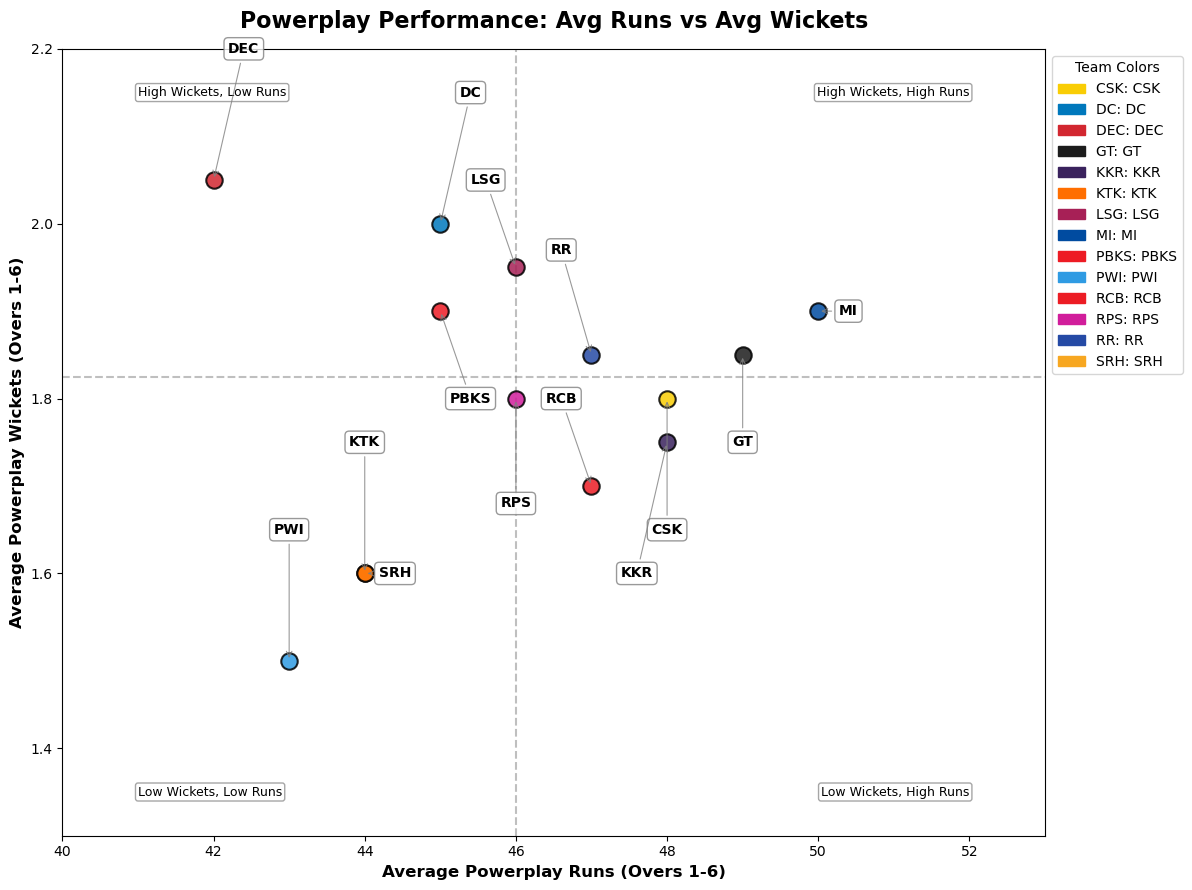

In [18]:

import matplotlib.patches as mpatches

# Sample data (replace with actual dataset)
powerplay_stats = pd.DataFrame({
    "Team": ["MI", "CSK", "RCB", "GT", "DC", "LSG", "KKR", "SRH", "RR", "PBKS", "RPS", "KTK", "DEC", "PWI"],
    "Avg Powerplay Runs": [50, 48, 47, 49, 45, 46, 48, 44, 47, 45, 46, 44, 42, 43],
    "Avg Powerplay Wickets": [1.9, 1.8, 1.7, 1.85, 2.0, 1.95, 1.75, 1.6, 1.85, 1.9, 1.8, 1.6, 2.05, 1.5]
}).set_index("Team")

team_colors = {
    "MI": "#004BA0", "CSK": "#F9CD05", "RCB": "#EC1C24", "GT": "#1C1C1C", "DC": "#0078BC",
    "LSG": "#A72056", "KKR": "#3A225D", "SRH": "#F7A721", "RR": "#254AA5", "PBKS": "#ED1B24",
    "RPS": "#D11D9B", "KTK": "#FF6E00", "DEC": "#D22730", "PWI": "#2F9BE3"
}

# Compute median values
median_x = powerplay_stats['Avg Powerplay Runs'].median()
median_y = powerplay_stats['Avg Powerplay Wickets'].median()

plt.figure(figsize=(14, 9))

# Scatter plot with team colors
for team, row in powerplay_stats.iterrows():
    plt.scatter(row['Avg Powerplay Runs'], row['Avg Powerplay Wickets'],
                s=140, color=team_colors[team], edgecolor="black", linewidth=1.5, alpha=0.85, zorder=3)

# Label offsets to prevent overlap
label_offsets = {
    "DC": (0.4, 0.15), "PBKS": (0.4, -0.1), "LSG": (-0.4, 0.1), "RPS": (0, -0.12),
    "CSK": (0, -0.15), "RR": (-0.4, 0.12), "MI": (0.4, 0), "SRH": (0.4, 0),
    "KKR": (-0.4, -0.15), "RCB": (-0.4, 0.1), "GT": (0, -0.1), "KTK": (0, 0.15),
    "DEC": (0.4, 0.15), "PWI": (0, 0.15)
}

# Add annotations with arrows
for team, row in powerplay_stats.iterrows():
    offset_x, offset_y = label_offsets.get(team, (0, 0))
    x, y = row['Avg Powerplay Runs'], row['Avg Powerplay Wickets']
    plt.annotate(
        team,
        xy=(x, y),
        xytext=(x + offset_x, y + offset_y),
        fontsize=10, fontweight='bold', ha='center', va='center',
        bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="gray", alpha=0.8),
        arrowprops=dict(arrowstyle="->", color='gray', linewidth=0.8, alpha=0.8),
        zorder=4
    )

# Reference lines for median values
plt.axvline(x=median_x, color='gray', linestyle='--', alpha=0.5, zorder=1)
plt.axhline(y=median_y, color='gray', linestyle='--', alpha=0.5, zorder=1)

# Adjust axis limits
plt.xlim(40, 53)
plt.ylim(1.3, 2.2)

# Titles and labels
plt.title('Powerplay Performance: Avg Runs vs Avg Wickets', fontsize=16, fontweight='bold', pad=15)
plt.xlabel('Average Powerplay Runs (Overs 1-6)', fontsize=12, fontweight='bold')
plt.ylabel('Average Powerplay Wickets (Overs 1-6)', fontsize=12, fontweight='bold')

# Quadrant labels
plt.text(41, 2.15, "High Wickets, Low Runs", fontsize=9, ha='left', va='center',
         bbox=dict(boxstyle="round,pad=0.2", fc="white", ec="gray", alpha=0.7))
plt.text(52, 2.15, "High Wickets, High Runs", fontsize=9, ha='right', va='center',
         bbox=dict(boxstyle="round,pad=0.2", fc="white", ec="gray", alpha=0.7))
plt.text(41, 1.35, "Low Wickets, Low Runs", fontsize=9, ha='left', va='center',
         bbox=dict(boxstyle="round,pad=0.2", fc="white", ec="gray", alpha=0.7))
plt.text(52, 1.35, "Low Wickets, High Runs", fontsize=9, ha='right', va='center',
         bbox=dict(boxstyle="round,pad=0.2", fc="white", ec="gray", alpha=0.7))

# Legend with color-coded team names
legend_patches = [mpatches.Patch(color=team_colors[team], label=f"{team}: {team}") for team in sorted(team_colors.keys())]
plt.legend(handles=legend_patches, loc='upper left', bbox_to_anchor=(1, 1), frameon=True, fontsize=10, title="Team Colors")

# Improve layout
plt.tight_layout()
plt.subplots_adjust(right=0.75)

# Save and display
plt.savefig('improved_powerplay_visualization.png', dpi=300, bbox_inches='tight')
plt.show()


<h1> Player Performance Stats </h1>

<h3>TOP 20 Scores by Bastmen</h3>

In [19]:
# Group by batter and calculate total runs
top_run_scorers = deliveries.groupby('batter')['batsman_runs'].sum().reset_index()

# Sort and get the top 20 run-scorers
top_run_scorers = top_run_scorers.sort_values(by='batsman_runs', ascending=False).head(20)

# Display the top 20 run-scorers
print("Top 20 Run-Scorers:")
print(top_run_scorers)

Top 20 Run-Scorers:
             batter  batsman_runs
631         V Kohli          8014
512        S Dhawan          6769
477       RG Sharma          6630
147       DA Warner          6567
546        SK Raina          5536
374        MS Dhoni          5243
30   AB de Villiers          5181
124        CH Gayle          4997
501      RV Uthappa          4954
282      KD Karthik          4843
289        KL Rahul          4689
50        AM Rahane          4642
188    F du Plessis          4571
572       SV Samson          4419
64        AT Rayudu          4348
194       G Gambhir          4217
564       SR Watson          3880
363       MK Pandey          3859
530        SA Yadav          3594
242      JC Buttler          3583


C:\Users\SUBHAYAN\AppData\Local\Temp\ipykernel_25452\4231657663.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='batsman_runs', y='batter', data=top_run_scorers, palette='viridis')


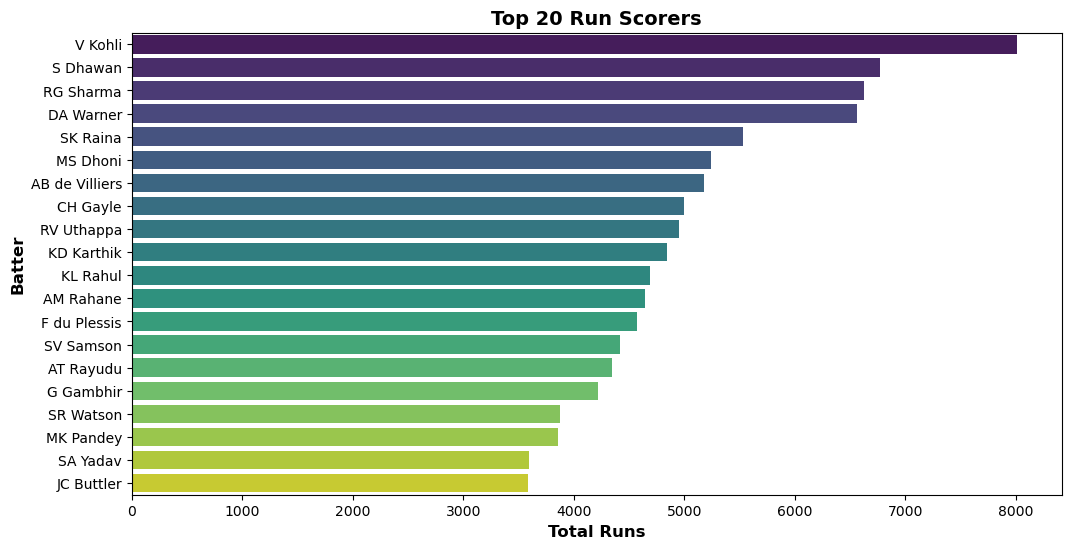

In [20]:
# Group by batter and calculate total runs
top_run_scorers = deliveries.groupby('batter')['batsman_runs'].sum().reset_index()

# Sort and get the top 20 run-scorers
top_run_scorers = top_run_scorers.sort_values(by='batsman_runs', ascending=False).head(20)

# Plot the data
plt.figure(figsize=(12, 6))
sns.barplot(x='batsman_runs', y='batter', data=top_run_scorers, palette='viridis')

# Add labels and title
plt.xlabel("Total Runs", fontsize=12, fontweight='bold')
plt.ylabel("Batter", fontsize=12, fontweight='bold')
plt.title("Top 20 Run Scorers", fontsize=14, fontweight='bold')

# Display the plot
plt.show()


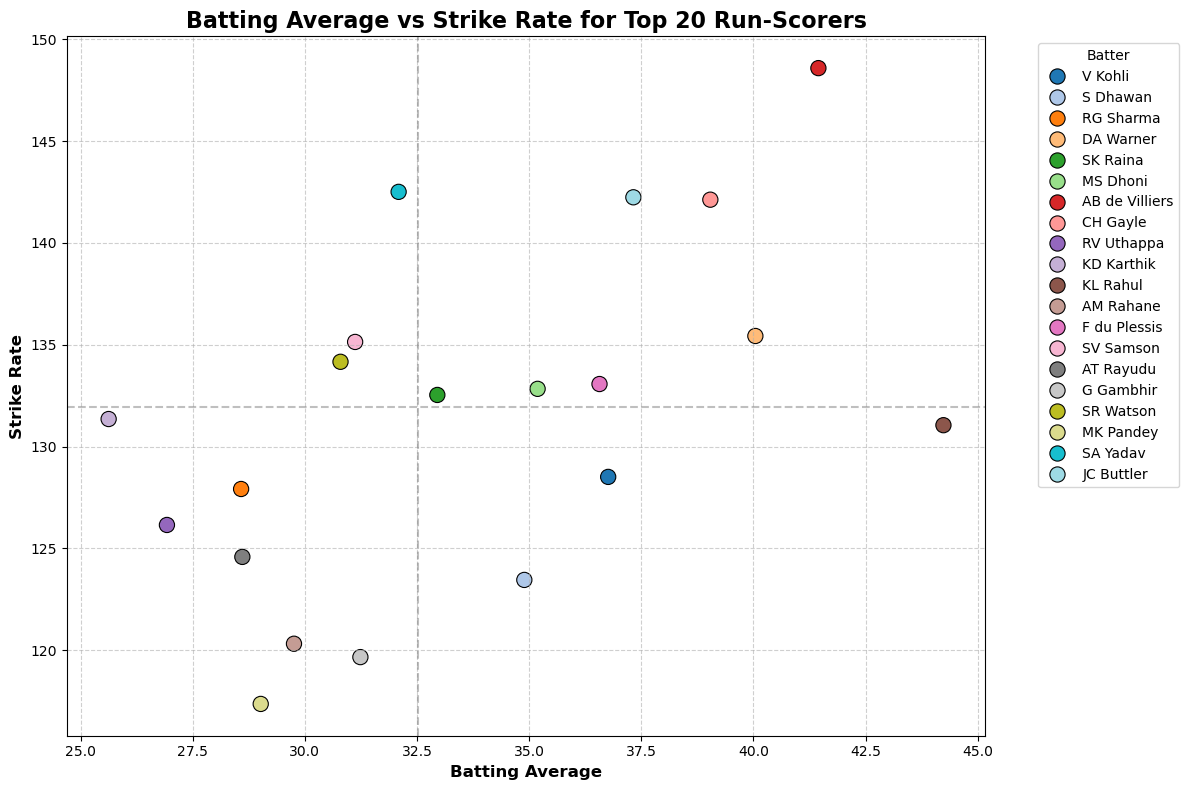

In [21]:
# Calculate batting average and strike rate for each player
player_stats = deliveries.groupby('batter').agg(
    total_runs=('batsman_runs', 'sum'),
    total_balls=('ball', 'count'),
    dismissals=('is_wicket', 'sum')
).reset_index()

# Avoid division by zero
player_stats['batting_average'] = player_stats['total_runs'] / player_stats['dismissals'].replace(0, np.nan)
player_stats['strike_rate'] = (player_stats['total_runs'] / player_stats['total_balls']) * 100

# Filter for top 20 run-scorers
top_20_batters = [
    "V Kohli", "S Dhawan", "RG Sharma", "DA Warner", "SK Raina",
    "MS Dhoni", "AB de Villiers", "CH Gayle", "RV Uthappa", "KD Karthik",
    "KL Rahul", "AM Rahane", "F du Plessis", "SV Samson", "AT Rayudu",
    "G Gambhir", "SR Watson", "MK Pandey", "SA Yadav", "JC Buttler"
]
top_20_stats = player_stats[player_stats['batter'].isin(top_20_batters)]

# Ensure consistent colors (same as before)
colors = sns.color_palette("tab20", 20)
color_map = dict(zip(top_20_batters, colors))

# Plot
plt.figure(figsize=(12, 8))
scatter = sns.scatterplot(
    data=top_20_stats, x='batting_average', y='strike_rate', 
    hue='batter', s=120, palette=color_map, edgecolor='black', linewidth=0.8
)

# Reorder legend
handles, labels = scatter.get_legend_handles_labels()
sorted_handles_labels = [(h, l) for l, h in sorted(zip(labels, handles), key=lambda x: top_20_batters.index(x[0]))]
sorted_handles, sorted_labels = zip(*sorted_handles_labels)

plt.legend(sorted_handles, sorted_labels, title="Batter", bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)

# Reference lines for median values
plt.axvline(top_20_stats['batting_average'].median(), color='gray', linestyle='--', alpha=0.5, label='Median Avg')
plt.axhline(top_20_stats['strike_rate'].median(), color='gray', linestyle='--', alpha=0.5, label='Median SR')

# Formatting
plt.title('Batting Average vs Strike Rate for Top 20 Run-Scorers', fontsize=16, fontweight='bold')
plt.xlabel('Batting Average', fontsize=12, fontweight='bold')
plt.ylabel('Strike Rate', fontsize=12, fontweight='bold')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()

# Show plot
plt.show()



C:\Users\SUBHAYAN\AppData\Local\Temp\ipykernel_25452\1971974574.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_10_avg, x='batter', y='batting_average', palette=viridis_colors)
C:\Users\SUBHAYAN\AppData\Local\Temp\ipykernel_25452\1971974574.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_10_sr, x='batter', y='strike_rate', palette=magma_colors)


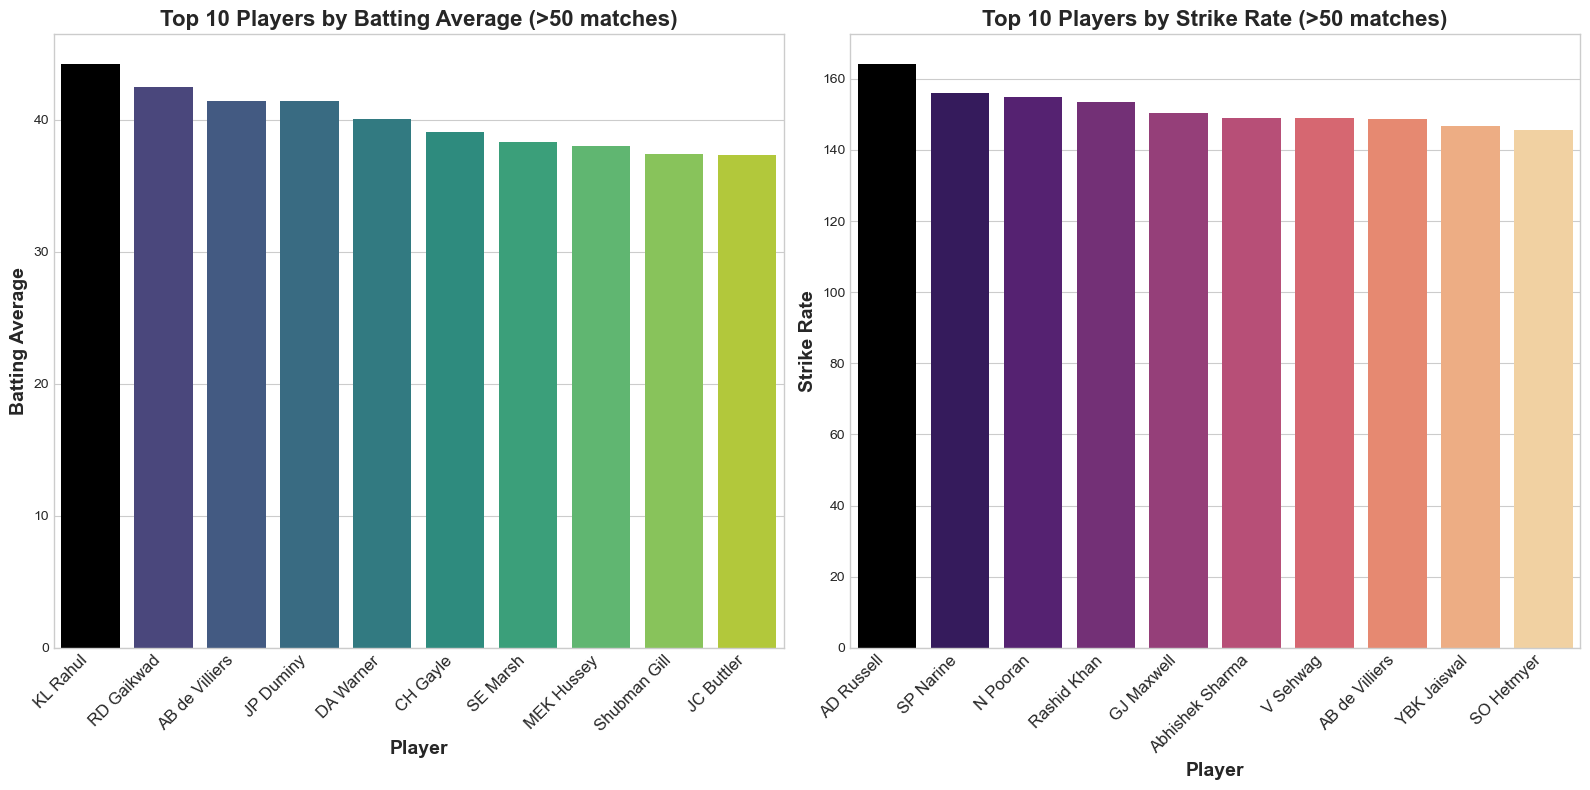

In [ ]:


viridis_colors = sns.color_palette('viridis', len(top_10_avg))
magma_colors = sns.color_palette('magma', len(top_10_sr))

viridis_colors[0] = (0, 0, 0)  # Set the top bar to black
magma_colors[0] = (0, 0, 0)  # Set the top bar to black

plt.figure(figsize=(16, 8))

# Batting Average Plot
plt.subplot(1, 2, 1)
sns.barplot(data=top_10_avg, x='batter', y='batting_average', palette=viridis_colors)
plt.title('Top 10 Players by Batting Average (>50 matches)', fontsize=16, fontweight='bold')
plt.xlabel('Player', fontsize=14, fontweight='bold')
plt.ylabel('Batting Average', fontsize=14, fontweight='bold')
plt.xticks(rotation=45, ha='right', fontsize=12)

# Strike Rate Plot
plt.subplot(1, 2, 2)
sns.barplot(data=top_10_sr, x='batter', y='strike_rate', palette=magma_colors)
plt.title('Top 10 Players by Strike Rate (>50 matches)', fontsize=16, fontweight='bold')
plt.xlabel('Player', fontsize=14, fontweight='bold')
plt.ylabel('Strike Rate', fontsize=14, fontweight='bold')
plt.xticks(rotation=45, ha='right', fontsize=12)

plt.tight_layout()
plt.show()


C:\Users\SUBHAYAN\AppData\Local\Temp\ipykernel_29972\1254803316.py:11: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




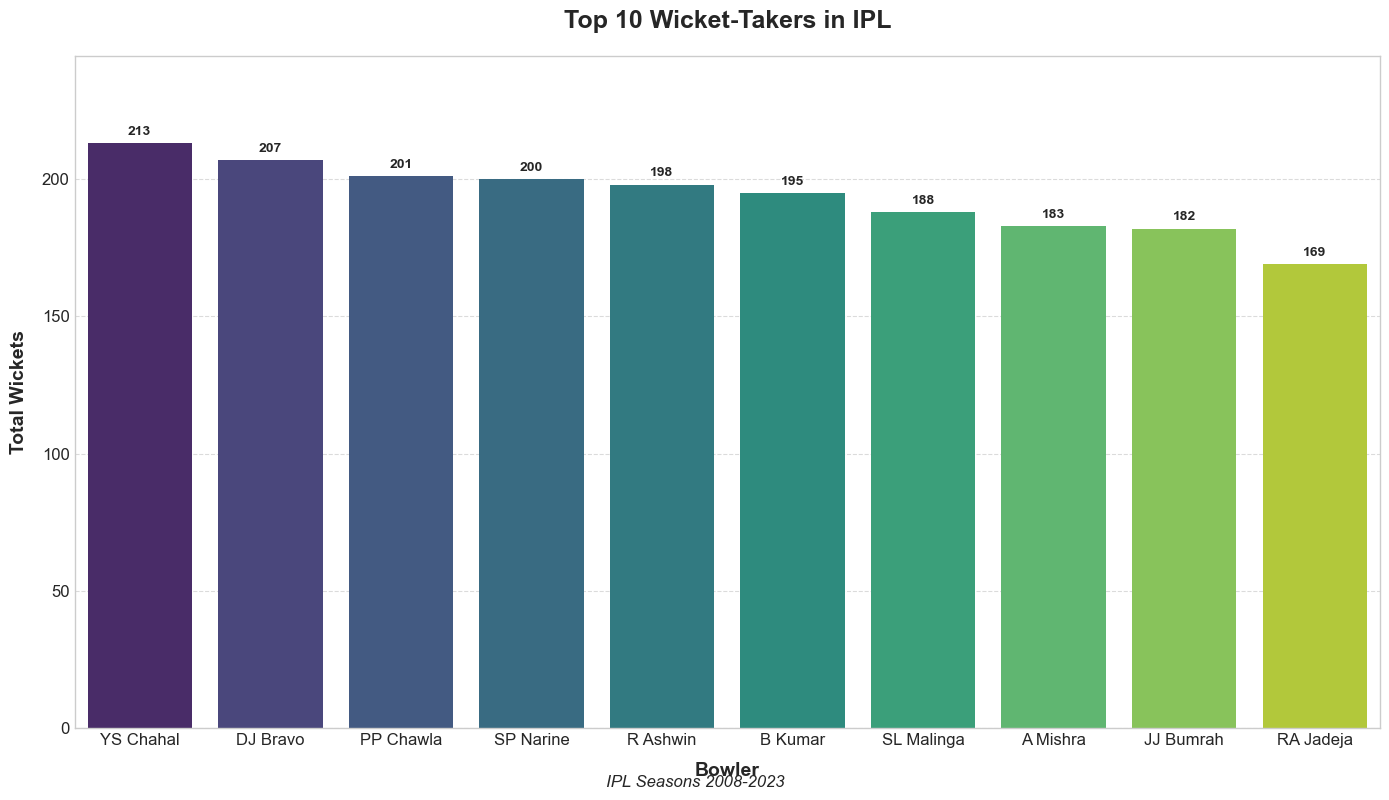

In [68]:
# Group by bowler and calculate total wickets
wicket_takers = deliveries[deliveries['is_wicket'] == 1].groupby('bowler').size().reset_index(name='total_wickets')

# Sort and get the top 10 wicket-takers
top_wicket_takers = wicket_takers.sort_values(by='total_wickets', ascending=False).head(10)

# Plot with improvements
plt.figure(figsize=(14, 8))

# Create the bar plot with ordered data
ax = sns.barplot(
    data=top_wicket_takers, 
    x='bowler', 
    y='total_wickets',
    palette='viridis',  # Better color palette
    order=top_wicket_takers.sort_values('total_wickets', ascending=False)['bowler']
)

# Add data labels
for i, v in enumerate(top_wicket_takers['total_wickets']):
    ax.text(i, v + 3, str(v), ha='center', fontweight='bold')

# Styling
plt.title('Top 10 Wicket-Takers in IPL', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Bowler', fontsize=14, fontweight='bold', labelpad=10)
plt.ylabel('Total Wickets', fontsize=14, fontweight='bold', labelpad=10)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Set y-axis to start from 0 with appropriate upper limit
plt.ylim(0, max(top_wicket_takers['total_wickets']) * 1.15)

# Add grid for horizontal lines only
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add a subtitle or context
plt.figtext(0.5, 0.01, 'IPL Seasons 2008-2023', ha='center', fontsize=12, style='italic')

# Adjust layout
plt.tight_layout()
plt.show()

C:\Users\SUBHAYAN\AppData\Local\Temp\ipykernel_29972\931616739.py:13: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




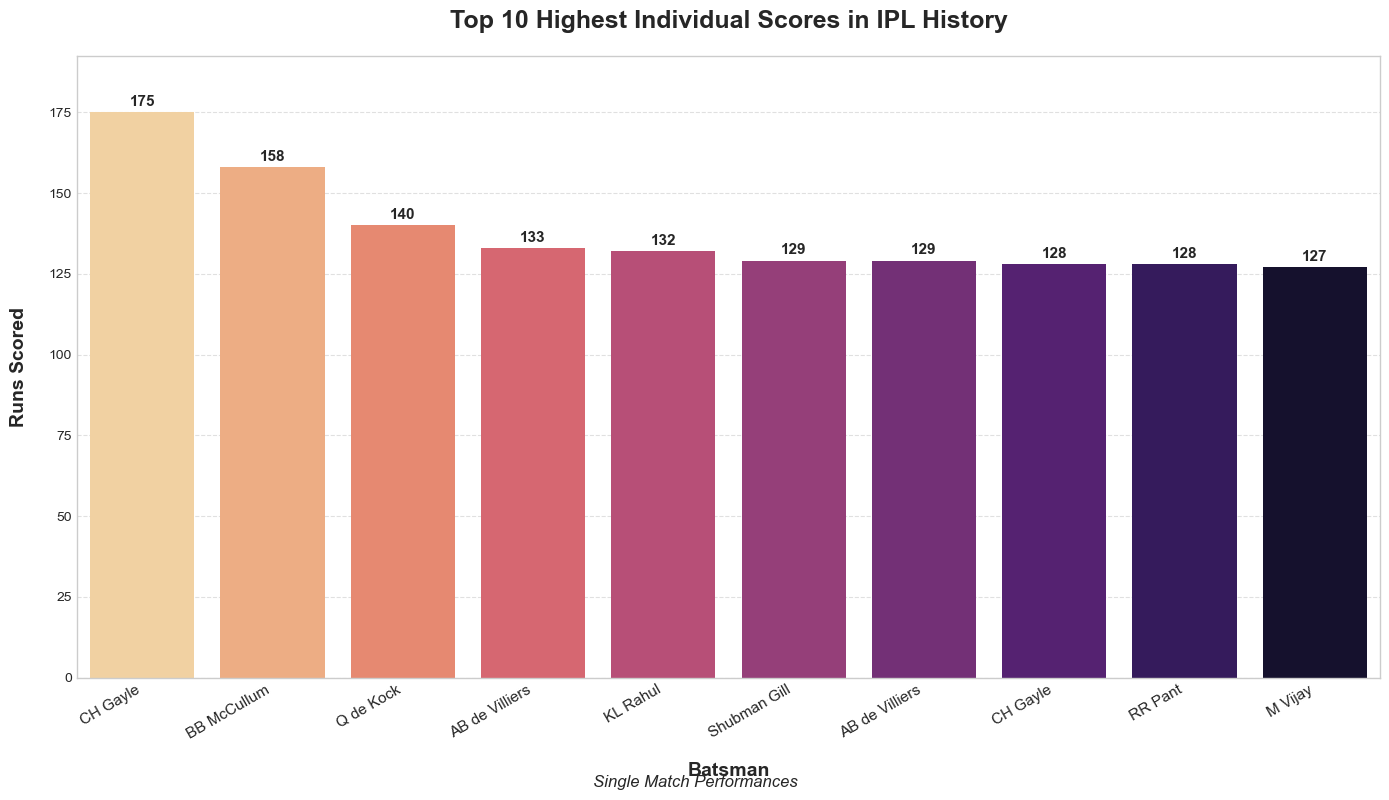

In [75]:
# Group by match_id and batter to calculate individual scores
individual_scores = deliveries.groupby(['match_id', 'batter'])['batsman_runs'].sum().reset_index()

# Sort and get the top 10 highest individual scores
top_individual_scores = individual_scores.sort_values(by='batsman_runs', ascending=False).head(10)

# Plot with improvements
plt.figure(figsize=(14, 8))

labels = top_individual_scores['batter']

# Create the bar plot with ordered data
ax = sns.barplot(
    x=range(len(top_individual_scores)), 
    y='batsman_runs',
    data=top_individual_scores,
    palette='magma_r'  # Reversed magma for better visual hierarchy
)

# Add data labels on top of bars
for i, v in enumerate(top_individual_scores['batsman_runs']):
    ax.text(i, v + 2, str(v), ha='center', fontweight='bold', fontsize=11)

# Set x-axis labels
plt.xticks(range(len(labels)), labels, fontsize=11, rotation=30, ha='right')

# Styling
plt.title('Top 10 Highest Individual Scores in IPL History', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Batsman', fontsize=14, fontweight='bold', labelpad=15)
plt.ylabel('Runs Scored', fontsize=14, fontweight='bold', labelpad=15)

# Set y-axis to start from 0 with appropriate upper limit
plt.ylim(0, max(top_individual_scores['batsman_runs']) * 1.1)

# Add grid for horizontal lines only
plt.grid(axis='y', linestyle='--', alpha=0.6)


# Add a subtitle with context
plt.figtext(0.5, 0.01, 'Single Match Performances', ha='center', fontsize=12, style='italic')

# Tight layout with additional bottom margin for annotations
plt.subplots_adjust(bottom=0.15)
plt.tight_layout()

plt.show()

C:\Users\SUBHAYAN\AppData\Local\Temp\ipykernel_29972\3821405922.py:15: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




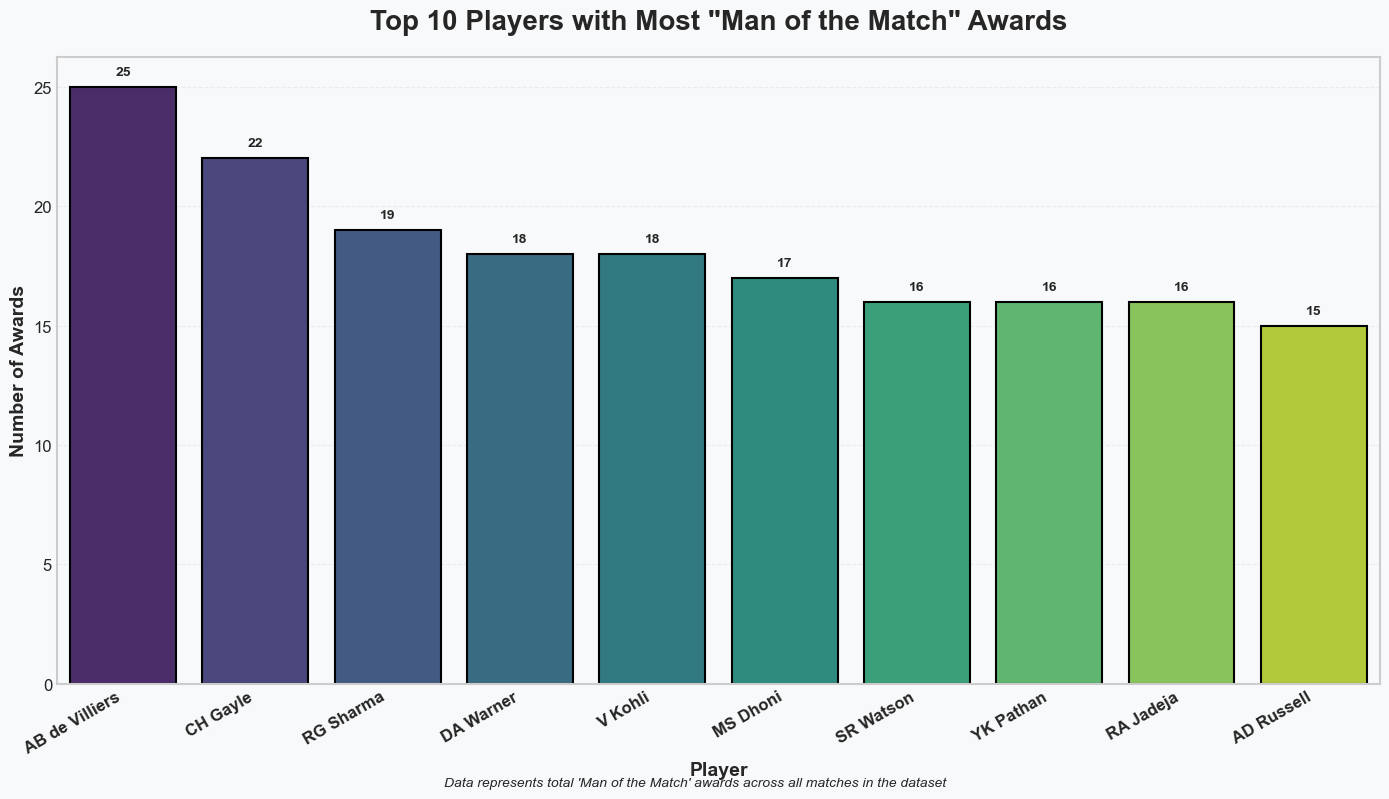

In [81]:
# Count the number of times each player has been Man of the Match
mom_counts = matches['player_of_match'].value_counts().reset_index()
mom_counts.columns = ['player', 'mom_count']

# Get the top 10 players with the most Man of the Match awards
top_mom_players = mom_counts.head(10)

# Create more visually appealing and readable plot
plt.figure(figsize=(14, 8))

# Use a custom color palette with greater contrast
custom_palette = sns.color_palette("viridis", len(top_mom_players))

# Create the bar plot with improved aesthetics
ax = sns.barplot(
    data=top_mom_players, 
    x='player', 
    y='mom_count', 
    palette=custom_palette,
    edgecolor='black',
    linewidth=1.5
)

# Add value labels on top of each bar
for i, v in enumerate(top_mom_players['mom_count']):
    ax.text(i, v + 0.5, str(v), ha='center', fontweight='bold')

# Add a title with improved formatting
plt.title('Top 10 Players with Most "Man of the Match" Awards', 
          fontsize=20, 
          fontweight='bold',
          pad=20)

# Improve axis labels
plt.xlabel('Player', fontsize=14, fontweight='bold')
plt.ylabel('Number of Awards', fontsize=14, fontweight='bold')

# Improve readability of player names
plt.xticks(rotation=30, ha='right', fontsize=12, fontweight='bold')
plt.yticks(fontsize=12)

# Add a subtle background grid for better readability of values
plt.grid(axis='y', linestyle='--', alpha=0.3)

# Add a border around the plot
for spine in ax.spines.values():
    spine.set_linewidth(1.5)
    
# Add a subtle background color
ax.set_facecolor('#f8f9fa')
fig = plt.gcf()
fig.patch.set_facecolor('#f8f9fa')

# Add a light annotation explaining the data
plt.figtext(0.5, 0.01, 
            "Data represents total 'Man of the Match' awards across all matches in the dataset", 
            ha='center', 
            fontsize=10, 
            style='italic')

# Ensure layout is optimized
plt.tight_layout()

# Show the plot
plt.show()

C:\Users\SUBHAYAN\AppData\Local\Temp\ipykernel_29972\2083670472.py:51: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


C:\Users\SUBHAYAN\AppData\Local\Temp\ipykernel_29972\2083670472.py:71: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

C:\Users\SUBHAYAN\AppData\Local\Temp\ipykernel_29972\2083670472.py:51: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


C:\Users\SUBHAYAN\AppData\Local\Temp\ipykernel_29972\2083670472.py:71: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

C:\Users\SUBHAYAN\AppData\Local\Temp\ipykernel_29972\2083670472.py:51: FutureWarning:


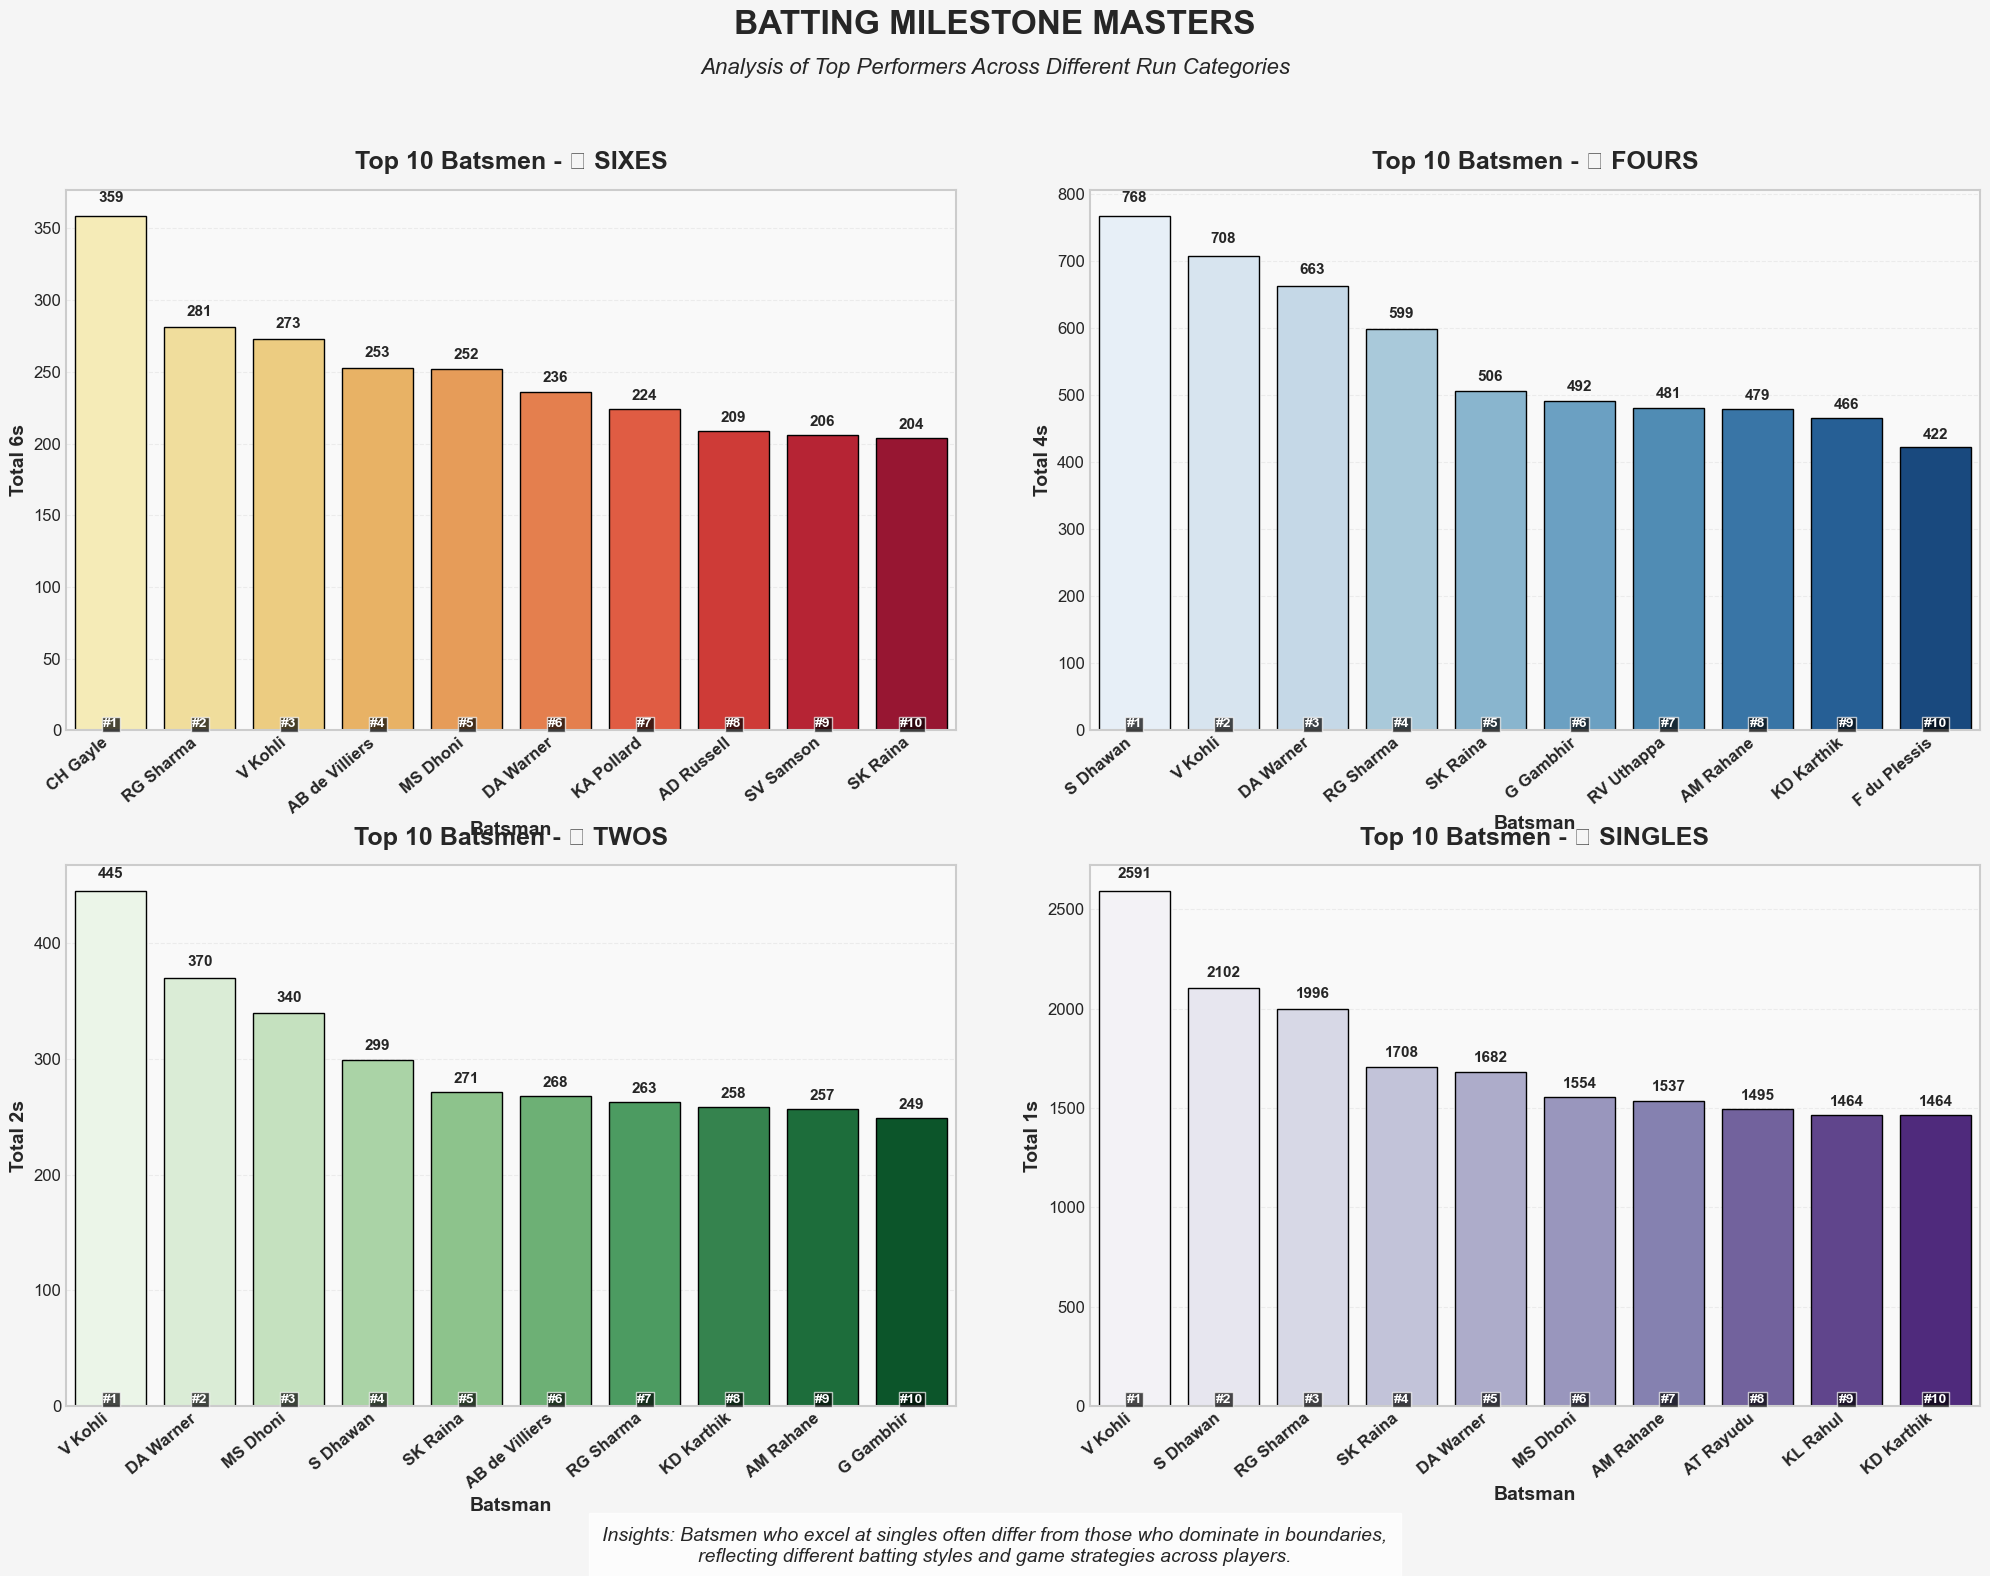

In [82]:
# Function to get top batsmen for a specific run category
def get_top_batsmen(run_type):
    # Filter deliveries for the specific run type
    runs_data = deliveries[deliveries['batsman_runs'] == run_type]
    
    # Group by batter and count the number of runs
    top_batsmen = runs_data.groupby('batter').size().reset_index(name=f'total_{run_type}s')
    
    # Sort and get the top 10 batsmen
    top_batsmen = top_batsmen.sort_values(by=f'total_{run_type}s', ascending=False).head(10)
    
    return top_batsmen

# Get top batsmen for each run category
top_6s_scorers = get_top_batsmen(6)
top_4s_scorers = get_top_batsmen(4)
top_2s_scorers = get_top_batsmen(2)
top_1s_scorers = get_top_batsmen(1)

# Create a 2x2 subplot grid for all run categories
fig, axes = plt.subplots(2, 2, figsize=(20, 16))
fig.patch.set_facecolor('#f5f5f5')

# Custom color palettes for each run category
color_palettes = {
    6: sns.color_palette("YlOrRd", 10),  # Red-orange for 6s (explosive)
    4: sns.color_palette("Blues", 10),    # Blues for 4s
    2: sns.color_palette("Greens", 10),   # Greens for 2s
    1: sns.color_palette("Purples", 10)   # Purples for 1s
}

# Custom titles with emoji icons
run_icons = {
    6: "🚀 SIXES",
    4: "💫 FOURS",
    2: "🏃 TWOS",
    1: "🏏 SINGLES"
}

# Data to plot in each subplot
plot_data = [
    (top_6s_scorers, 6, axes[0, 0]),
    (top_4s_scorers, 4, axes[0, 1]),
    (top_2s_scorers, 2, axes[1, 0]),
    (top_1s_scorers, 1, axes[1, 1])
]

# Loop through each dataset and create enhanced subplots
for data, run_type, ax in plot_data:
    # Create bar plot on the specified axis
    bars = sns.barplot(
        data=data, 
        x='batter', 
        y=f'total_{run_type}s', 
        palette=color_palettes[run_type],
        ax=ax,
        edgecolor='black',
        linewidth=1
    )
    
    # Add value labels on top of each bar
    for i, v in enumerate(data[f'total_{run_type}s']):
        ax.text(i, v + (v*0.02), str(v), ha='center', va='bottom', fontweight='bold', fontsize=11)
    
    # Set titles and labels with improved formatting
    ax.set_title(f"Top 10 Batsmen - {run_icons[run_type]}", fontsize=18, fontweight='bold', pad=15)
    ax.set_xlabel('Batsman', fontsize=14, fontweight='bold')
    ax.set_ylabel(f'Total {run_type}s', fontsize=14, fontweight='bold')
    
    # Improve readability of batsmen names
    ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha='right', fontsize=12, fontweight='bold')
    ax.tick_params(axis='y', labelsize=12)
    
    # Add a subtle background grid for better readability
    ax.grid(axis='y', linestyle='--', alpha=0.3)
    
    # Style the subplot
    ax.set_facecolor('#f9f9f9')
    for spine in ax.spines.values():
        spine.set_linewidth(1.5)
    
    # Add rank numbers to the bars
    for i in range(len(data)):
        ax.text(i, 0, f"#{i+1}", ha='center', va='bottom', fontweight='bold', 
                fontsize=10, color='white', bbox=dict(facecolor='black', alpha=0.7, pad=1))

# Add a main title for the entire figure
fig.suptitle('BATTING MILESTONE MASTERS', fontsize=24, fontweight='bold', y=0.98)

# Add explanatory subtitle
plt.figtext(0.5, 0.94, 'Analysis of Top Performers Across Different Run Categories', 
           ha='center', fontsize=16, style='italic')

# Add data insight annotation
plt.figtext(0.5, 0.01, 
           "Insights: Batsmen who excel at singles often differ from those who dominate in boundaries,\nreflecting different batting styles and game strategies across players.",
           ha='center', fontsize=14, style='italic', bbox=dict(facecolor='white', alpha=0.8, pad=10))

# Adjust spacing between subplots
plt.tight_layout(rect=[0, 0.03, 1, 0.93])
plt.subplots_adjust(wspace=0.15, hspace=0.25)

# Show the plot
plt.show()

Rows with infinite values in batting_average: 0
Rows with infinite values in bowling_economy: 0
Rows with NaN values: batter                  59
total_runs              59
dismissals              59
batting_average          0
bowler                 194
total_runs_conceded    194
total_overs            194
bowling_economy          0
dtype: int64


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


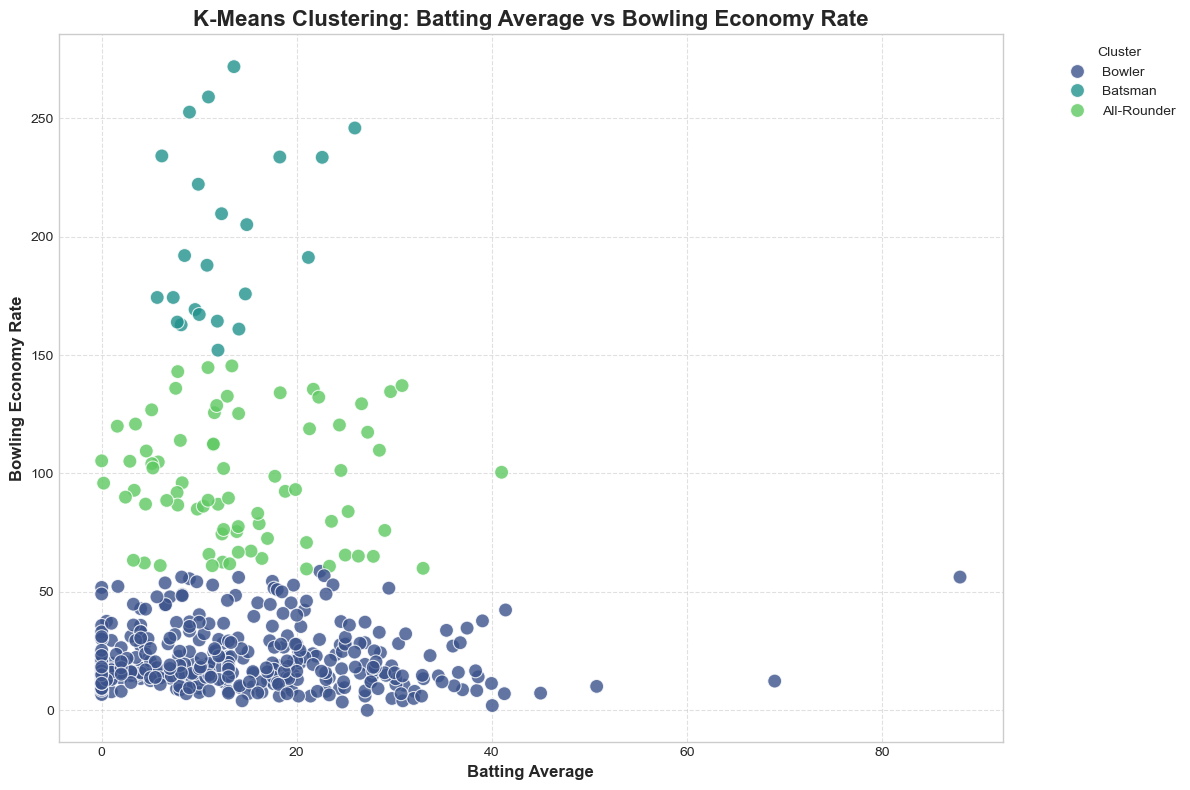

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Calculate batting average for each player
batting_stats = deliveries.groupby('batter').agg(
    total_runs=('batsman_runs', 'sum'),
    dismissals=('is_wicket', 'sum')
).reset_index()

# Handle division by zero for batting average
batting_stats['batting_average'] = np.where(
    batting_stats['dismissals'] == 0,
    0,  # Set batting average to 0 if dismissals are 0
    batting_stats['total_runs'] / batting_stats['dismissals']
)

# Calculate bowling economy rate for each player
bowling_stats = deliveries.groupby('bowler').agg(
    total_runs_conceded=('total_runs', 'sum'),
    total_overs=('over', lambda x: x.nunique())  # Approximate overs bowled
).reset_index()

# Handle division by zero for bowling economy
bowling_stats['bowling_economy'] = np.where(
    bowling_stats['total_overs'] == 0,
    0,  # Set bowling economy to 0 if overs bowled are 0
    bowling_stats['total_runs_conceded'] / bowling_stats['total_overs']
)

# Merge batting and bowling stats
player_stats = pd.merge(batting_stats, bowling_stats, left_on='batter', right_on='bowler', how='outer')

# Fill NaN values (players who haven't batted or bowled)
player_stats['batting_average'] = player_stats['batting_average'].fillna(0)
player_stats['bowling_economy'] = player_stats['bowling_economy'].fillna(0)

# Filter out players with no batting or bowling data
player_stats = player_stats[(player_stats['batting_average'] > 0) | (player_stats['bowling_economy'] > 0)]

# Check for infinite or NaN values
print("Rows with infinite values in batting_average:", player_stats[player_stats['batting_average'] == np.inf].shape[0])
print("Rows with infinite values in bowling_economy:", player_stats[player_stats['bowling_economy'] == np.inf].shape[0])
print("Rows with NaN values:", player_stats.isnull().sum())

# Remove rows with infinite values (if any)
player_stats = player_stats.replace([np.inf, -np.inf], np.nan).dropna()

# Select relevant columns for clustering
X = player_stats[['batting_average', 'bowling_economy']]

# Apply K-Means clustering with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
player_stats['cluster'] = kmeans.fit_predict(X)

# Define cluster labels
cluster_labels = {
    0: 'Batsman',
    1: 'Bowler',
    2: 'All-Rounder'
}
player_stats['cluster_label'] = player_stats['cluster'].map(cluster_labels)

# Plot the clusters
plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=player_stats,
    x='batting_average',
    y='bowling_economy',
    hue='cluster_label',
    palette='viridis',
    s=100,
    alpha=0.8
)
plt.title('K-Means Clustering: Batting Average vs Bowling Economy Rate', fontsize=16, fontweight='bold')
plt.xlabel('Batting Average', fontsize=12, fontweight='bold')
plt.ylabel('Bowling Economy Rate', fontsize=12, fontweight='bold')
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

C:\Users\SUBHAYAN\AppData\Local\Temp\ipykernel_25452\1368831534.py:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  batting_stats['dismissals'].fillna(0, inplace=True)
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


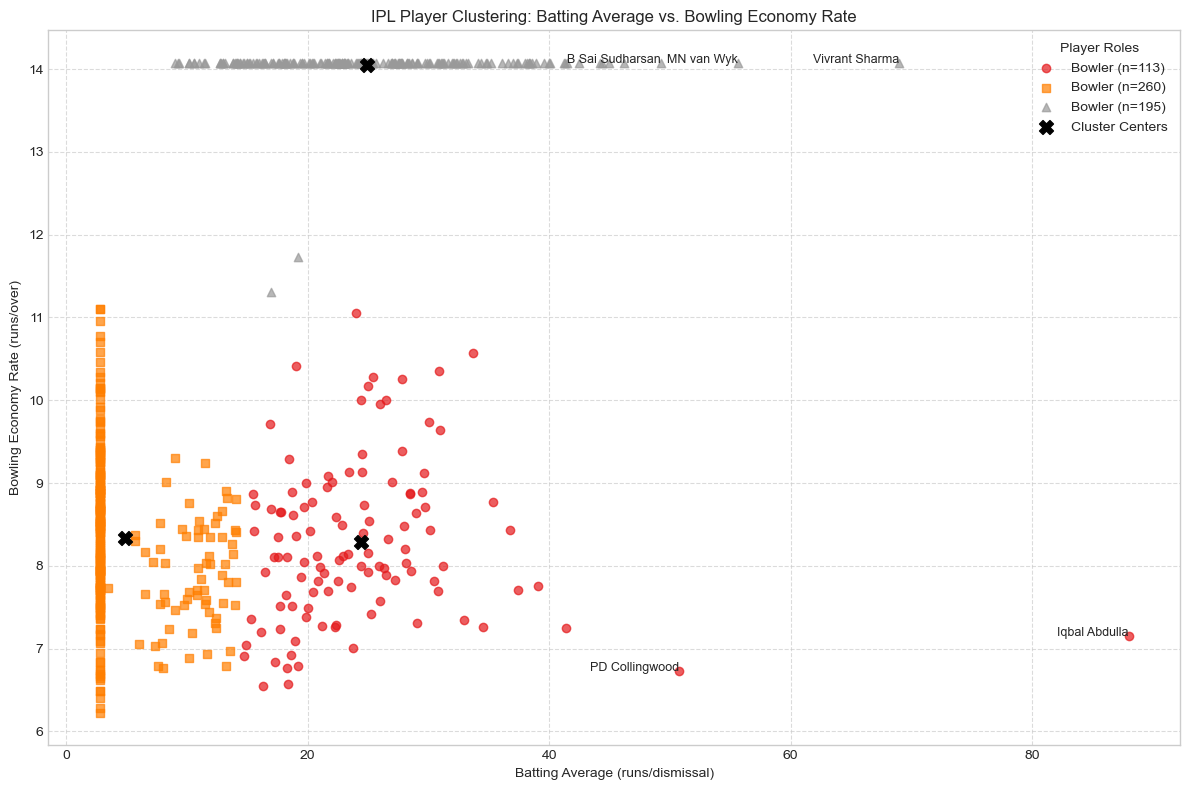


Player Role Distribution:
     role  Count
0  Bowler    568

Top Bowlers:
              player  batting_average  economy_rate
510    Sohail Tanvir         2.773333      6.226415
2         A Chandila         2.773333      6.282051
152       FH Edwards         2.773333      6.400000
221      JW Hastings         2.773333      6.491803
475  SMSM Senanayake         2.773333      6.492308


In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Load the datasets
matches = pd.read_csv('cleaned_ipl_matches_v2.csv')
deliveries = pd.read_csv('cleaned_ipl_deliveries_v2.csv')

# Function to compute batting stats
def calculate_batting_stats(deliveries):
    batting_stats = deliveries.groupby('batter').agg(
        batsman_runs=('batsman_runs', 'sum'),
        dismissals=('player_dismissed', 'count')
    ).reset_index()
    
    batting_stats['dismissals'].fillna(0, inplace=True)
    batting_stats['batting_average'] = batting_stats['batsman_runs'] / batting_stats['dismissals'].replace(0, 1)
    return batting_stats[batting_stats['batsman_runs'] >= 50]

# Function to compute bowling stats
def calculate_bowling_stats(deliveries):
    bowling_stats = deliveries.groupby('bowler').agg(
        balls_bowled=('ball', 'count'),
        runs_conceded=('total_runs', 'sum')
    ).reset_index()
    
    bowling_stats['economy_rate'] = (bowling_stats['runs_conceded'] / bowling_stats['balls_bowled']) * 6
    return bowling_stats[bowling_stats['balls_bowled'] >= 60]

# Calculate batting & bowling stats
batting_stats = calculate_batting_stats(deliveries)
bowling_stats = calculate_bowling_stats(deliveries)

# Merge batting and bowling stats
player_stats = pd.merge(batting_stats[['batter', 'batting_average']],
                         bowling_stats[['bowler', 'economy_rate']],
                         left_on='batter',
                         right_on='bowler',
                         how='outer')

# Handle missing values
player_stats.fillna({'economy_rate': player_stats['economy_rate'].max() * 1.2,
                      'batting_average': player_stats['batting_average'].min() * 0.8}, inplace=True)
player_stats['player'] = player_stats['batter'].combine_first(player_stats['bowler'])
player_stats = player_stats[['player', 'batting_average', 'economy_rate']]

# Normalize features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(player_stats[['batting_average', 'economy_rate']])

# K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42, n_init='auto')
player_stats['cluster'] = kmeans.fit_predict(scaled_features)

# Assign roles based on cluster centers
cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)
cluster_df = pd.DataFrame(cluster_centers, columns=['batting_average', 'economy_rate'])
cluster_df['cluster'] = range(len(cluster_df))

# Function to determine player role
def assign_role(row):
    if row['batting_average'] > 30 and row['economy_rate'] > 8:
        return 'All-rounder'
    elif row['batting_average'] > row['economy_rate'] * 3:
        return 'Batsman'
    else:
        return 'Bowler'

cluster_df['role'] = cluster_df.apply(assign_role, axis=1)
role_mapping = dict(zip(cluster_df['cluster'], cluster_df['role']))
player_stats['role'] = player_stats['cluster'].map(role_mapping)

# Visualization
plt.figure(figsize=(12, 8))
colors = plt.cm.Set1(np.linspace(0, 1, 3))
markers = ['o', 's', '^']

for cluster in range(3):
    cluster_data = player_stats[player_stats['cluster'] == cluster]
    plt.scatter(cluster_data['batting_average'], cluster_data['economy_rate'],
                c=[colors[cluster]], marker=markers[cluster],
                label=f"{role_mapping[cluster]} (n={len(cluster_data)})", alpha=0.7)

# Plot cluster centers
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='black', marker='X', s=100, label='Cluster Centers')

# Annotations for top players
for top in player_stats.sort_values('batting_average', ascending=False).head(5).itertuples():
    plt.annotate(top.player, (top.batting_average, top.economy_rate), fontsize=9, ha='right')

plt.title('IPL Player Clustering: Batting Average vs. Bowling Economy Rate')
plt.xlabel('Batting Average (runs/dismissal)')
plt.ylabel('Bowling Economy Rate (runs/over)')
plt.legend(title='Player Roles')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('ipl_player_clustering.png', dpi=300)
plt.show()

# Role summary
print("\nPlayer Role Distribution:")
print(player_stats.groupby('role')['player'].count().reset_index().rename(columns={'player': 'Count'}))

# Top players
for role in player_stats['role'].unique():
    metric = 'batting_average' if role == 'Batsman' else 'economy_rate'
    sorted_players = player_stats[player_stats['role'] == role].sort_values(metric, ascending=(role == 'Bowler')).head(5)
    print(f"\nTop {role}s:")
    print(sorted_players[['player', 'batting_average', 'economy_rate']])


<h1>SEASON STATS </h1>

C:\Users\SUBHAYAN\AppData\Local\Temp\ipykernel_25452\1775082037.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='season', y='total_runs', data=avg_runs_per_season, palette='viridis')


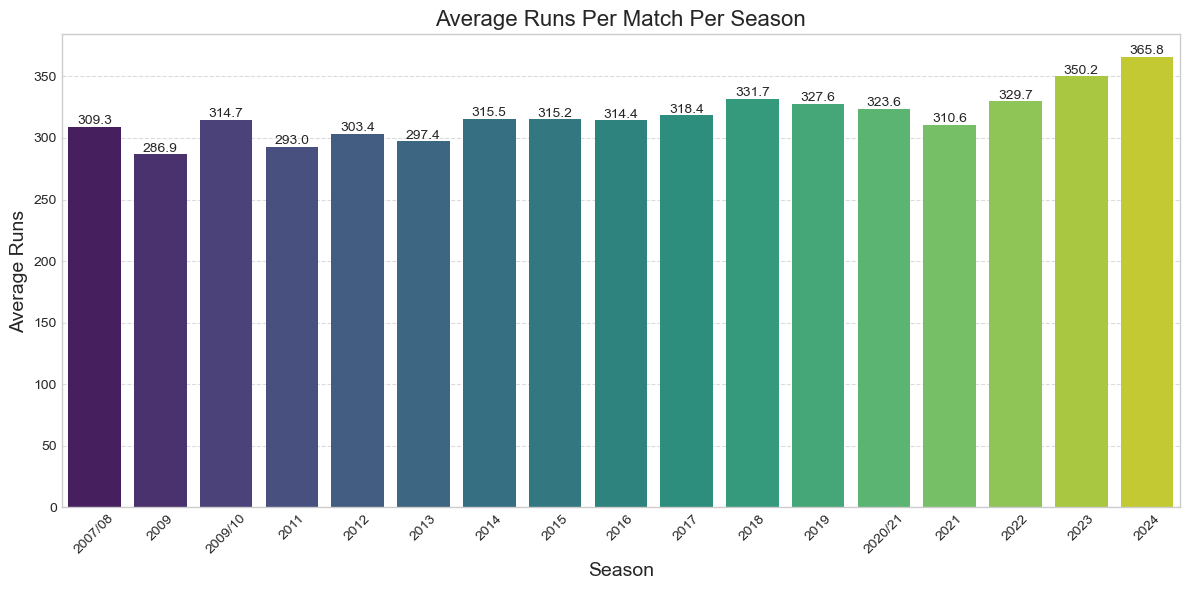

In [41]:
matches_df = pd.read_csv('cleaned_ipl_matches_v2.csv')
deliveries_df = pd.read_csv('cleaned_ipl_deliveries_v2.csv')

# Group by match_id and season, then calculate the total runs per match
match_runs = deliveries_df.groupby('match_id')['total_runs'].sum().reset_index()

# Merge with matches dataframe to get the season information
match_runs_season = pd.merge(match_runs, matches_df[['id', 'season']], 
                            left_on='match_id', right_on='id')

# Calculate average runs per match per season
avg_runs_per_season = match_runs_season.groupby('season')['total_runs'].mean().reset_index()

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x='season', y='total_runs', data=avg_runs_per_season, palette='viridis')
plt.title('Average Runs Per Match Per Season', fontsize=16)
plt.xlabel('Season', fontsize=14)
plt.ylabel('Average Runs', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

for i, v in enumerate(avg_runs_per_season['total_runs']):
    plt.text(i, v + 2, f'{v:.1f}', ha='center', fontsize=10)

plt.tight_layout()
plt.show()

C:\Users\SUBHAYAN\AppData\Local\Temp\ipykernel_25452\468126761.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='season', y='count', data=high_targets_count, palette='magma')


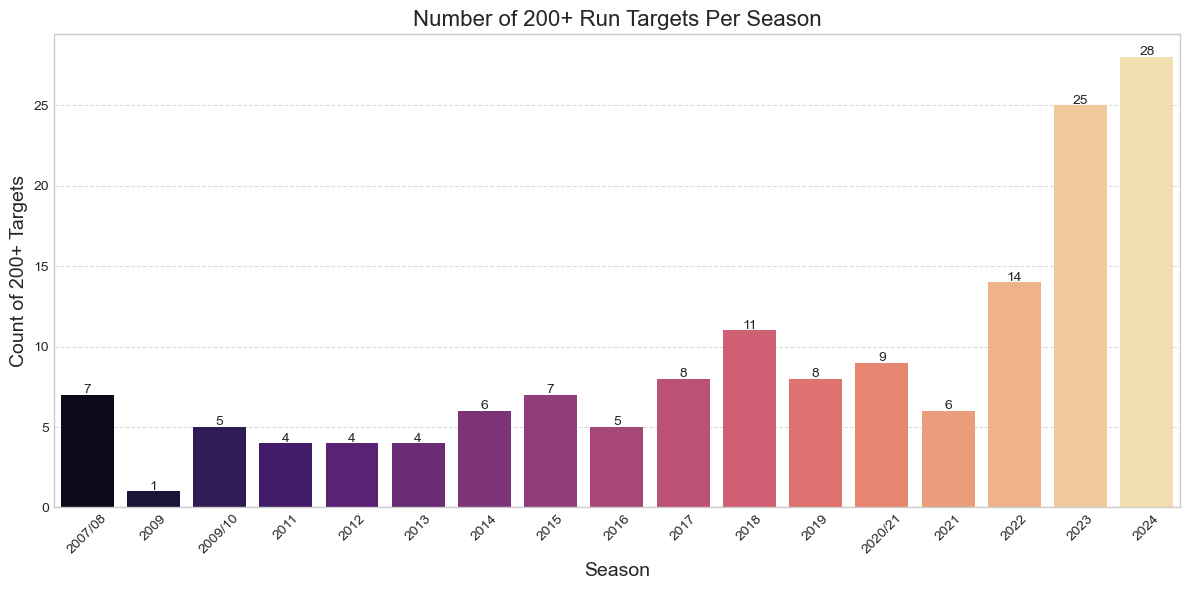

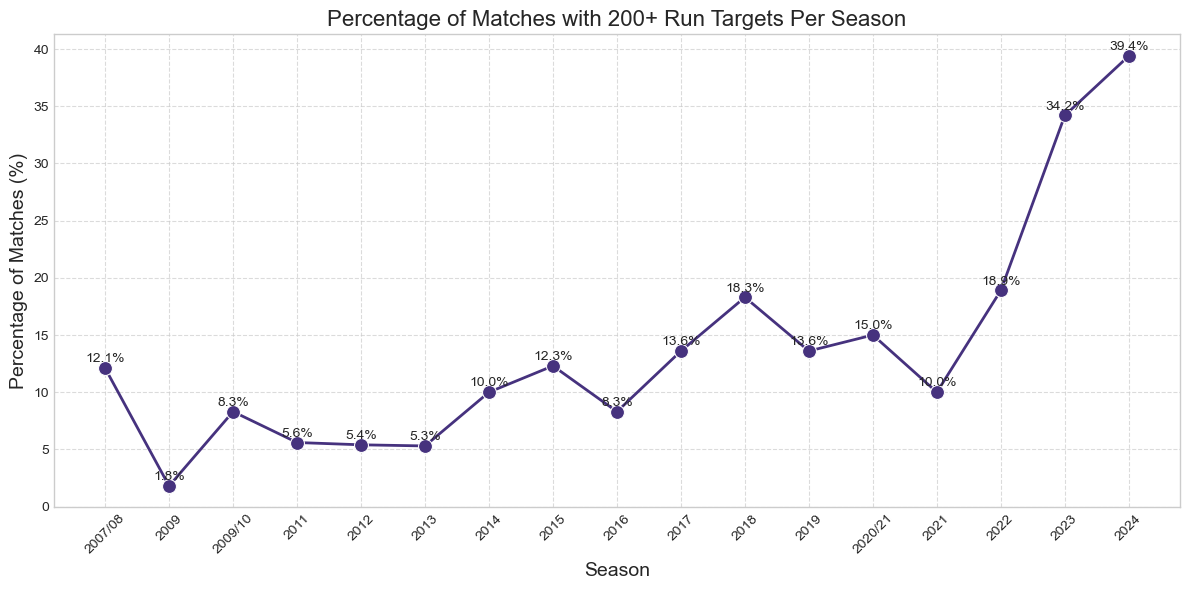

In [42]:

# Filter matches with targets of 200+ runs
high_targets = matches_df[matches_df['target_runs'] >= 200]

# Count high targets per season
high_targets_count = high_targets.groupby('season').size().reset_index(name='count')

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x='season', y='count', data=high_targets_count, palette='magma')
plt.title('Number of 200+ Run Targets Per Season', fontsize=16)
plt.xlabel('Season', fontsize=14)
plt.ylabel('Count of 200+ Targets', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add count labels on top of bars
for i, v in enumerate(high_targets_count['count']):
    plt.text(i, v + 0.1, str(v), ha='center', fontsize=10)

plt.tight_layout()
plt.show()

# Additional analysis: Percentage of matches with 200+ targets per season
total_matches_per_season = matches_df.groupby('season').size().reset_index(name='total_matches')
high_targets_percent = pd.merge(high_targets_count, total_matches_per_season, on='season')
high_targets_percent['percentage'] = (high_targets_percent['count'] / high_targets_percent['total_matches'] * 100).round(1)

plt.figure(figsize=(12, 6))
sns.lineplot(x='season', y='percentage', data=high_targets_percent, marker='o', linewidth=2, markersize=10)
plt.title('Percentage of Matches with 200+ Run Targets Per Season', fontsize=16)
plt.xlabel('Season', fontsize=14)
plt.ylabel('Percentage of Matches (%)', fontsize=14)
plt.xticks(rotation=45)
plt.grid(linestyle='--', alpha=0.7)

for i, row in enumerate(high_targets_percent.itertuples()):
    plt.text(i, row.percentage + 0.5, f'{row.percentage}%', ha='center', fontsize=10)

plt.tight_layout()
plt.show()

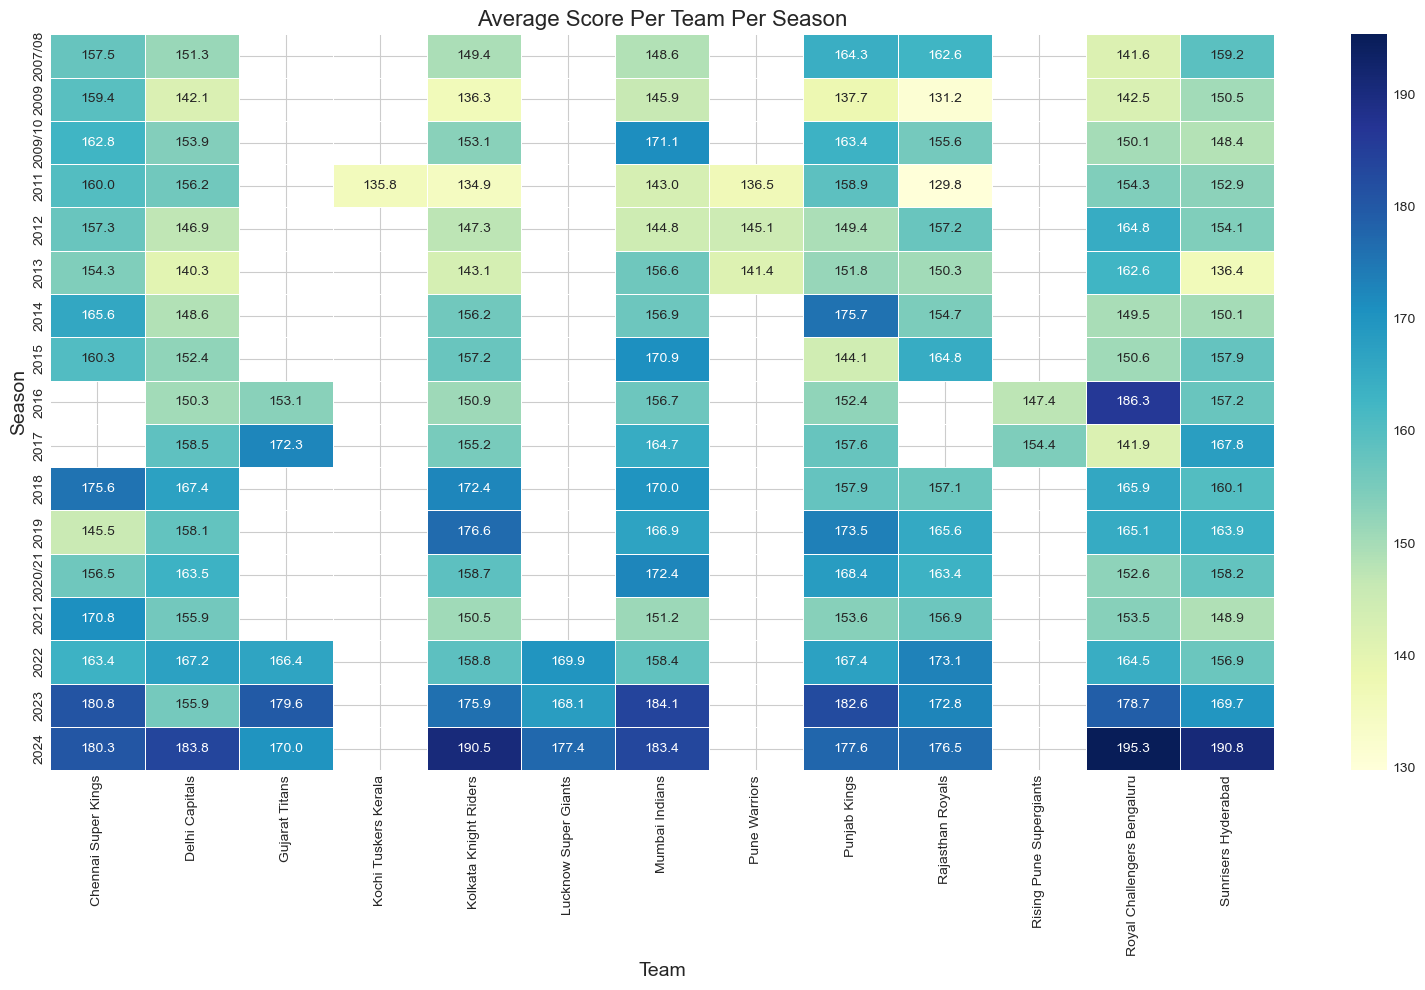

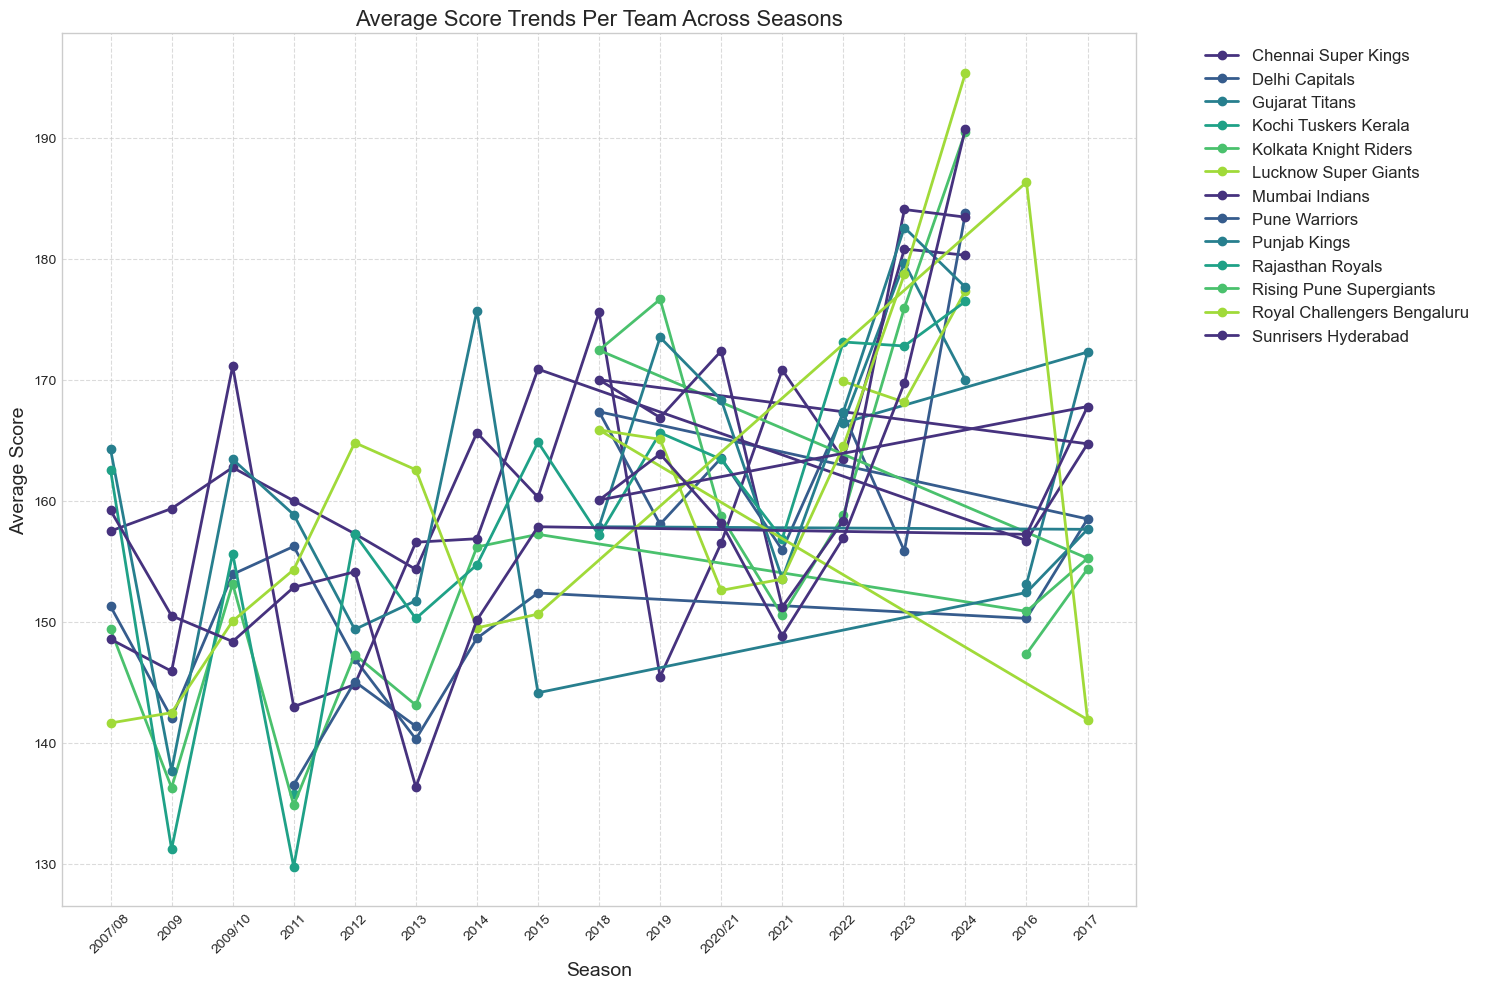

In [43]:

# Group by match_id and batting_team to get total score per team per match
team_match_scores = deliveries_df.groupby(['match_id', 'batting_team'])['total_runs'].sum().reset_index()

# Merge with matches dataframe to get the season information
team_match_scores = pd.merge(
    team_match_scores,
    matches_df[['id', 'season']],
    left_on='match_id',
    right_on='id'
)

# Calculate average score per team per season
avg_team_score_per_season = team_match_scores.groupby(['season', 'batting_team'])['total_runs'].mean().reset_index()

# Get list of teams and seasons for plotting
teams = sorted(avg_team_score_per_season['batting_team'].unique())
seasons = sorted(avg_team_score_per_season['season'].unique())

# Create a pivot table for easier plotting
pivot_df = avg_team_score_per_season.pivot(index='season', columns='batting_team', values='total_runs')

# Plot heatmap
plt.figure(figsize=(16, 10))
sns.heatmap(pivot_df, annot=True, fmt='.1f', cmap='YlGnBu', linewidths=0.5)
plt.title('Average Score Per Team Per Season', fontsize=16)
plt.ylabel('Season', fontsize=14)
plt.xlabel('Team', fontsize=14)
plt.tight_layout()
plt.show()

# Plot line chart for trend analysis
plt.figure(figsize=(15, 10))
for team in teams:
    team_data = avg_team_score_per_season[avg_team_score_per_season['batting_team'] == team]
    plt.plot(team_data['season'], team_data['total_runs'], marker='o', linewidth=2, label=team)

plt.title('Average Score Trends Per Team Across Seasons', fontsize=16)
plt.xlabel('Season', fontsize=14)
plt.ylabel('Average Score', fontsize=14)
plt.grid(linestyle='--', alpha=0.7)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

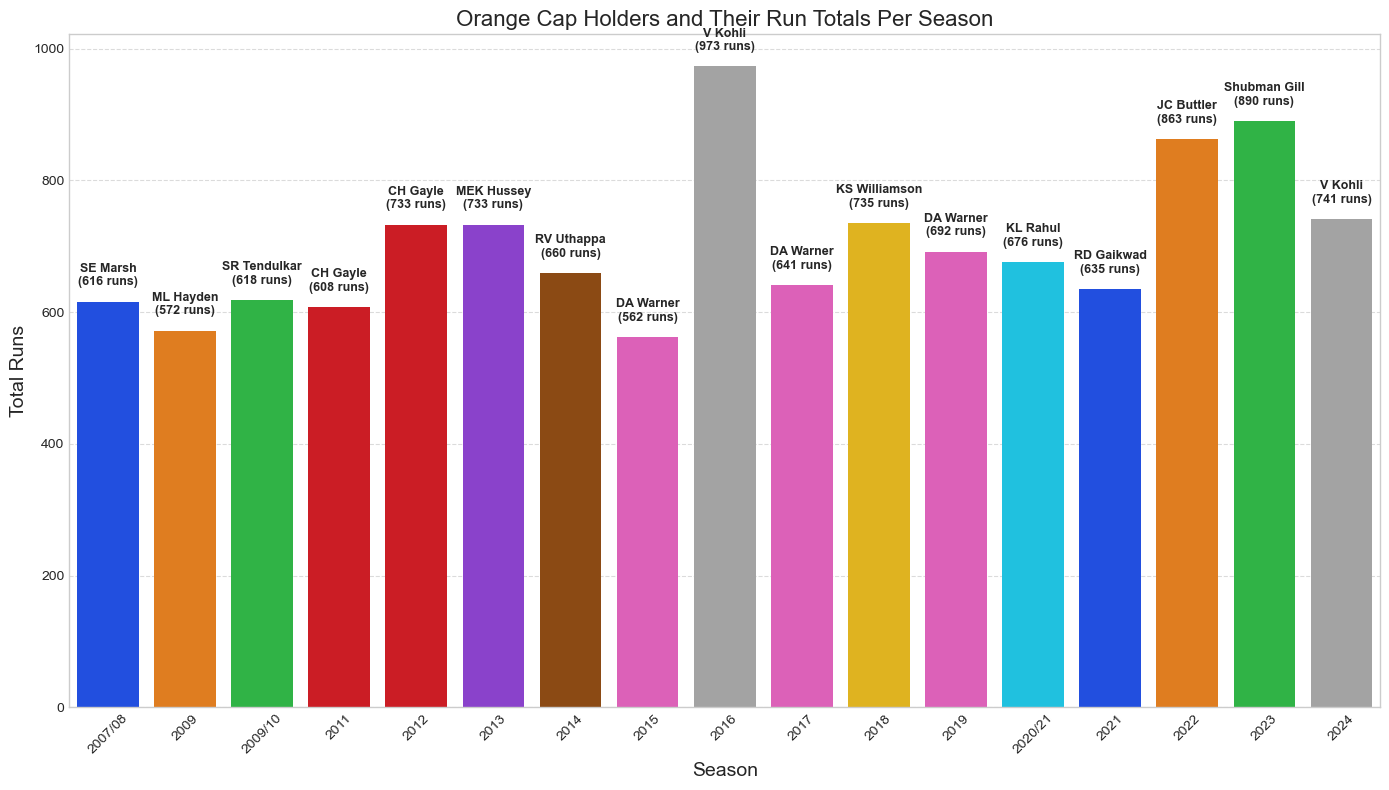

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and 

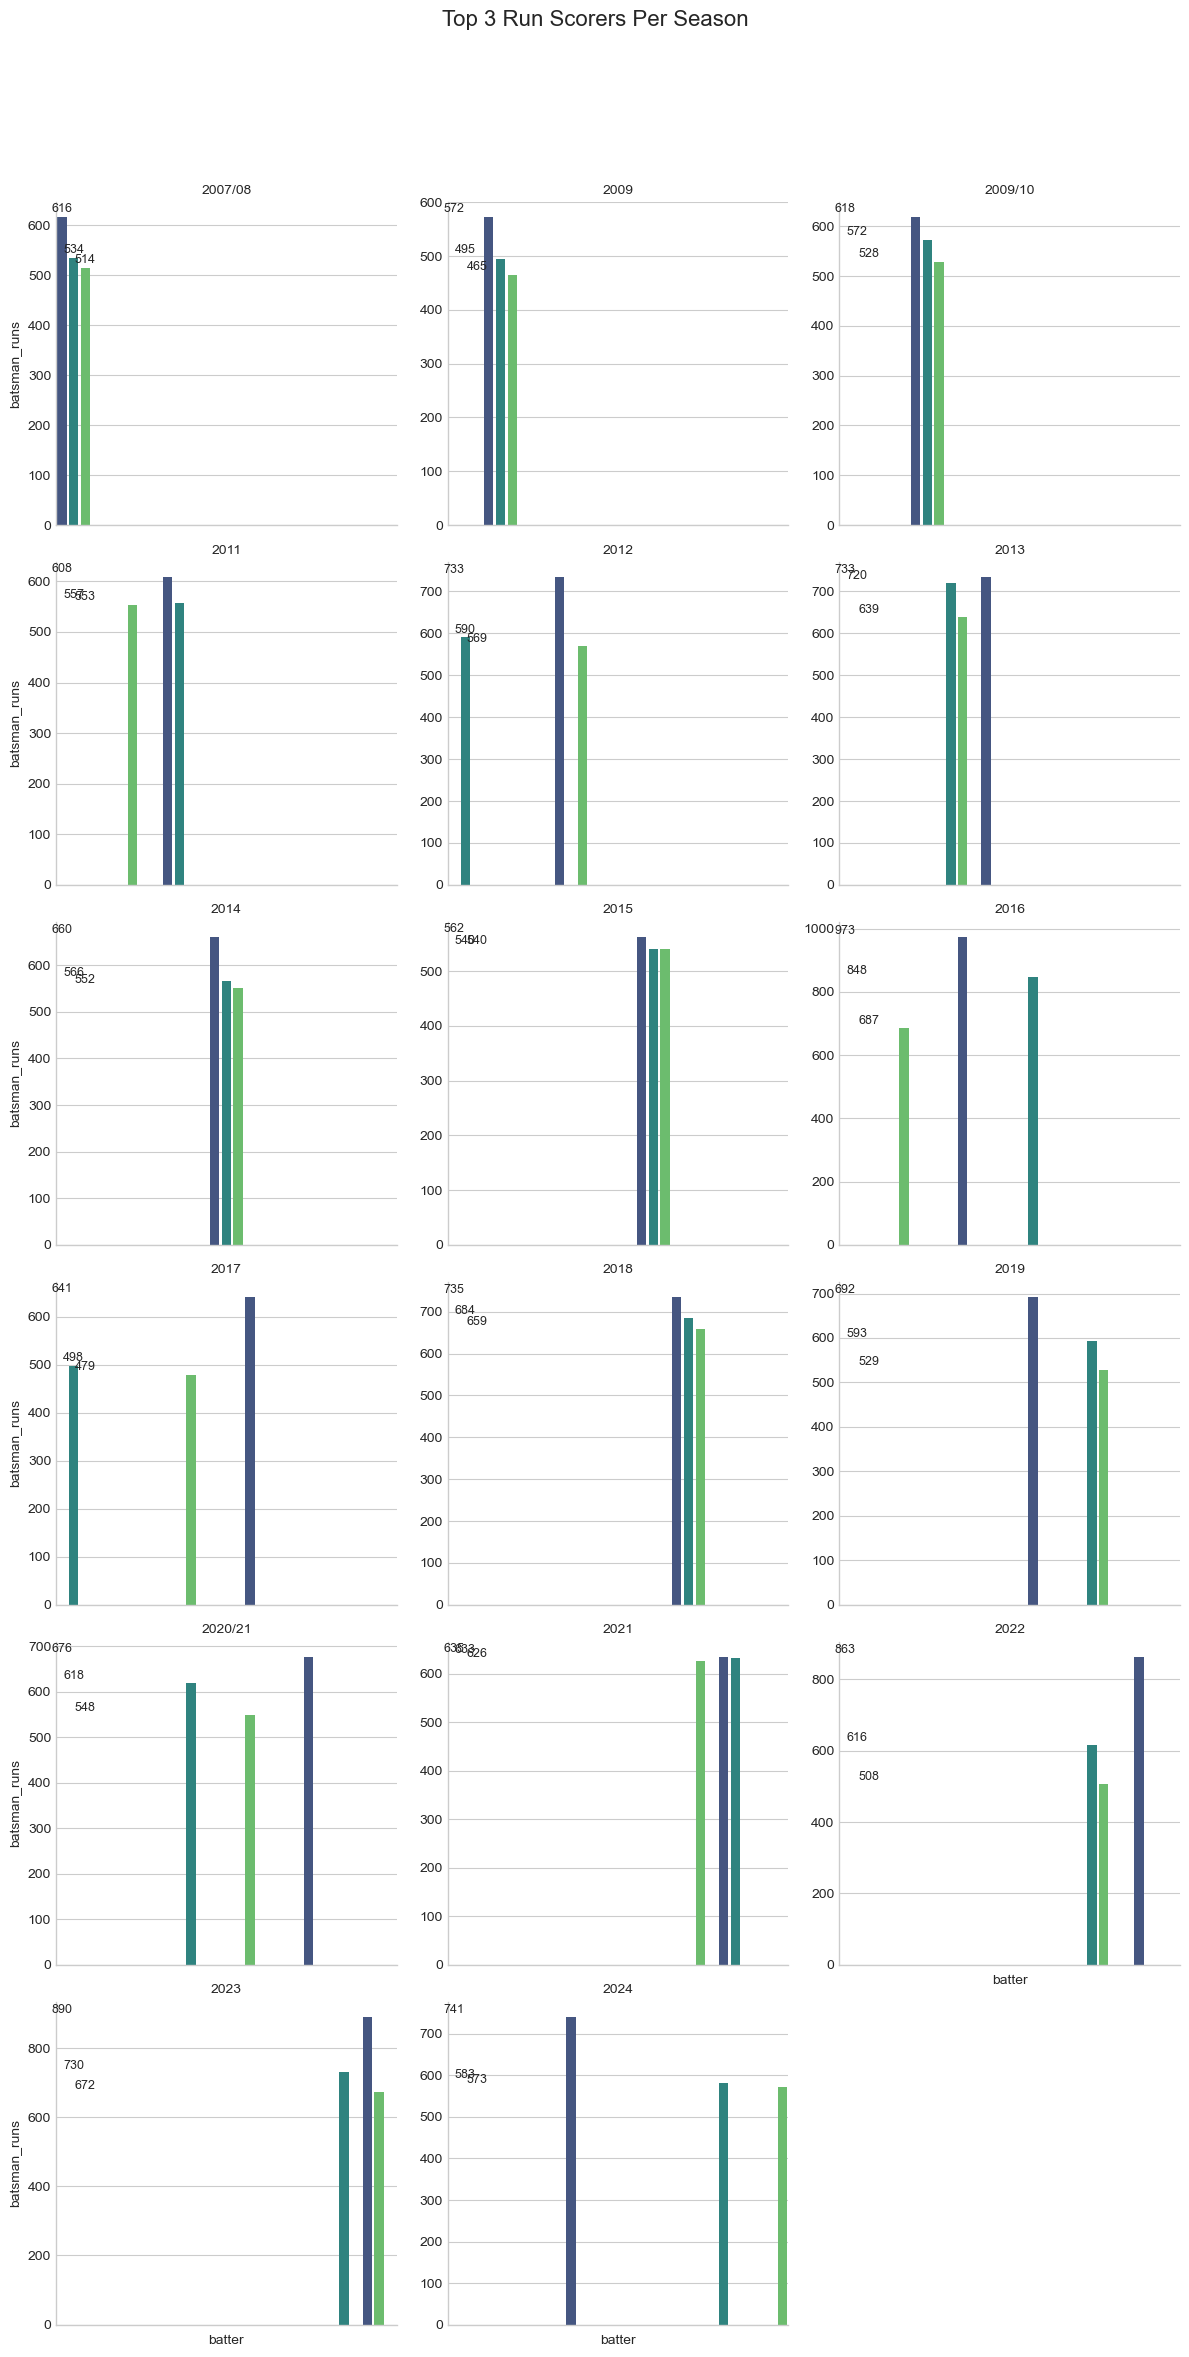

In [44]:

# Merge deliveries with matches to get season information
deliveries_with_season = pd.merge(
    deliveries_df,
    matches_df[['id', 'season']],
    left_on='match_id',
    right_on='id'
)

# Calculate total runs scored by each batsman in each season
batsman_runs_per_season = deliveries_with_season.groupby(['season', 'batter'])['batsman_runs'].sum().reset_index()

# Identify Orange Cap holders (batsmen with maximum runs in each season)
orange_cap_holders = batsman_runs_per_season.loc[
    batsman_runs_per_season.groupby('season')['batsman_runs'].idxmax()
]

# Plot Orange Cap holders' runs per season
plt.figure(figsize=(14, 8))
bar_plot = sns.barplot(x='season', y='batsman_runs', hue='batter', data=orange_cap_holders, dodge=False, palette='bright')

# Add text labels with batsman names and run totals
for i, row in enumerate(orange_cap_holders.itertuples()):
    plt.text(i, row.batsman_runs + 20, f'{row.batter}\n({row.batsman_runs} runs)', 
             ha='center', va='bottom', rotation=0, fontsize=9, fontweight='bold')

plt.title('Orange Cap Holders and Their Run Totals Per Season', fontsize=16)
plt.xlabel('Season', fontsize=14)
plt.ylabel('Total Runs', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend().remove()  # Remove the legend since we've added text labels
plt.tight_layout()
plt.show()

# Additional analysis: Top 3 batsmen per season
top_batsmen = (batsman_runs_per_season
               .sort_values(['season', 'batsman_runs'], ascending=[True, False])
               .groupby('season')
               .head(3)
               .reset_index(drop=True))

# Create a faceted bar plot showing top 3 batsmen for each season
g = sns.FacetGrid(top_batsmen, col='season', col_wrap=3, height=4, sharey=False)
g.map_dataframe(sns.barplot, x='batter', y='batsman_runs', palette='viridis')
g.set_xticklabels(rotation=90)
g.set_titles('{col_name}')
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Top 3 Run Scorers Per Season', fontsize=16)

# Add run totals on top of each bar
for ax, season in zip(g.axes.flatten(), sorted(top_batsmen['season'].unique())):
    season_data = top_batsmen[top_batsmen['season'] == season]
    for i, row in enumerate(season_data.itertuples()):
        ax.text(i, row.batsman_runs + 10, str(row.batsman_runs), ha='center', fontsize=9)

plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()

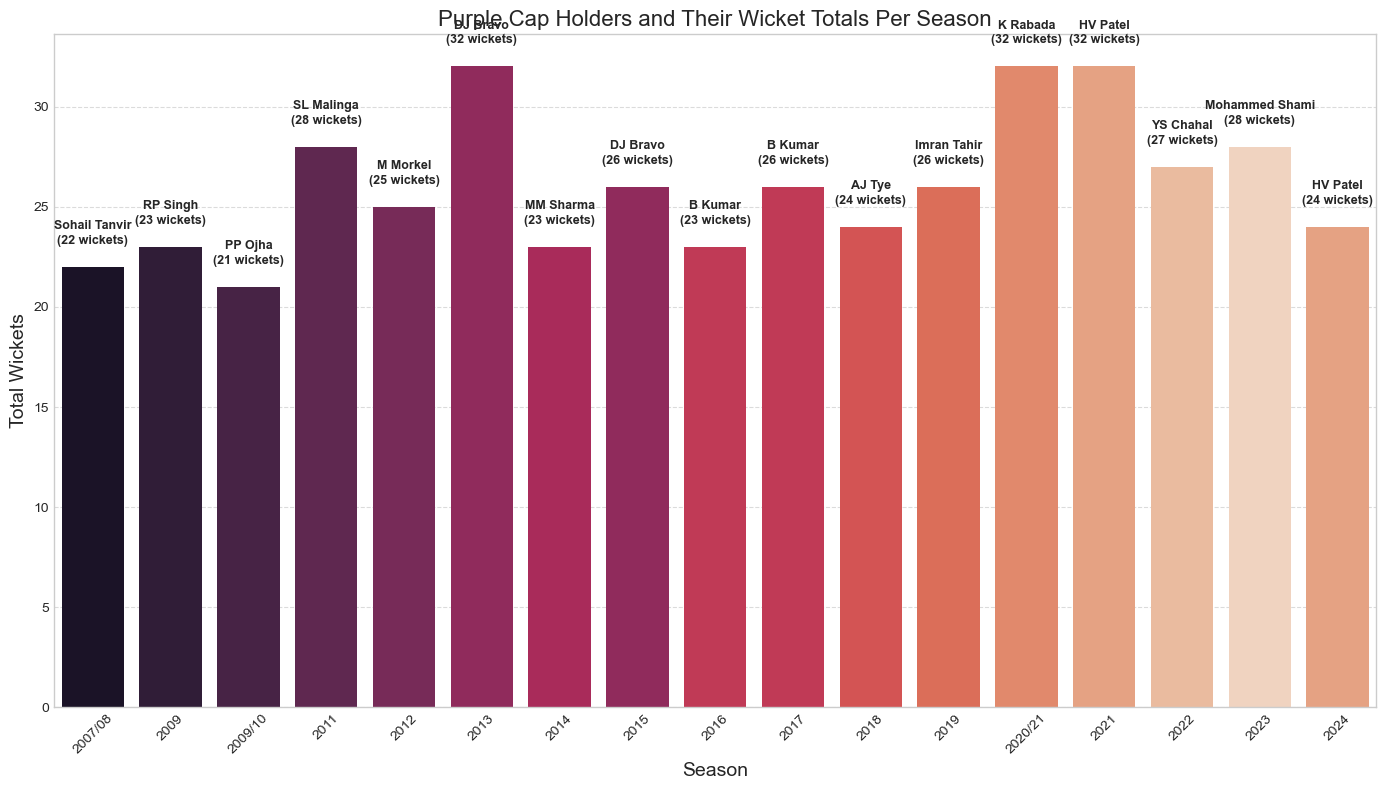

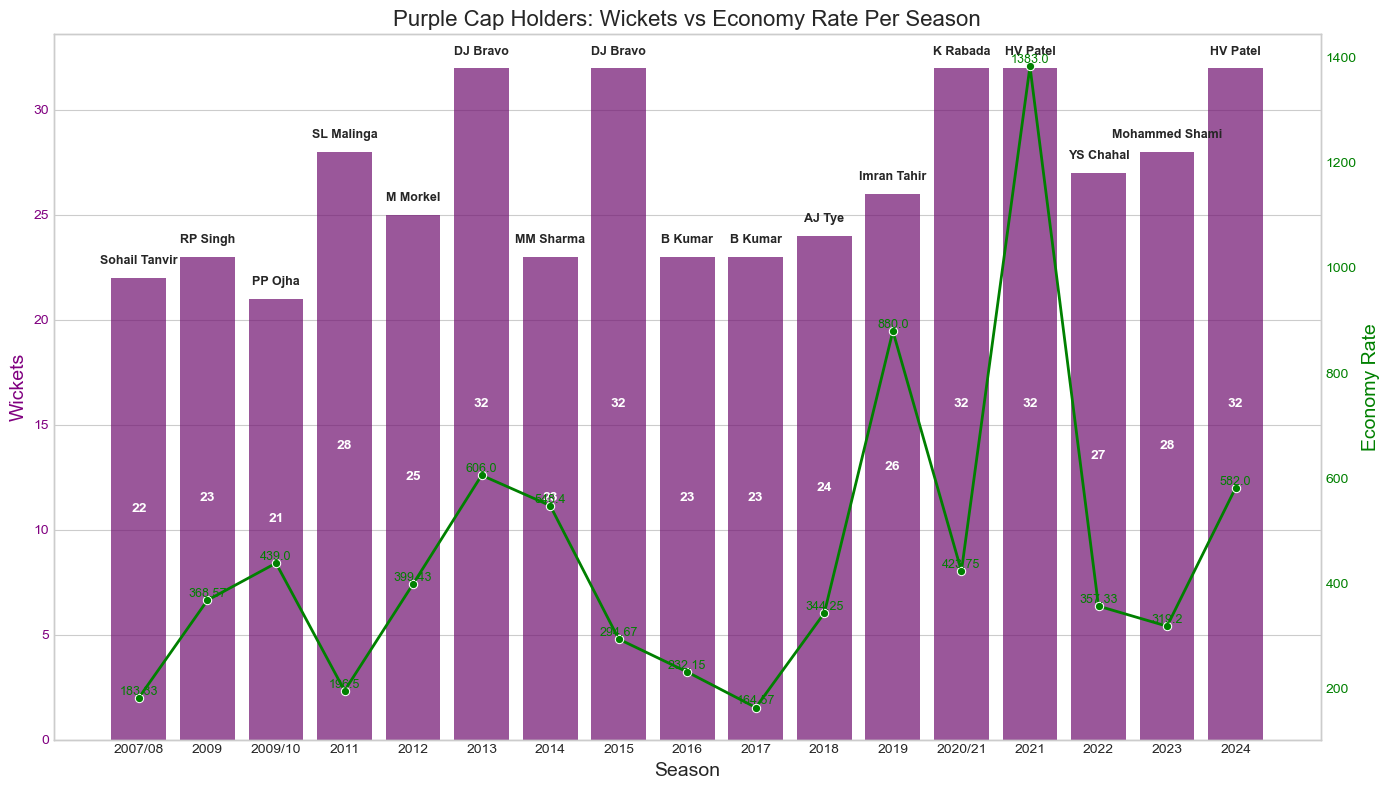

In [45]:

# Merge deliveries with matches to get season information
deliveries_with_season = pd.merge(
    deliveries_df,
    matches_df[['id', 'season']],
    left_on='match_id',
    right_on='id'
)

# Count wickets taken by each bowler in each season
# Only count wickets where is_wicket = 1 and dismissal is not run out
wickets_df = deliveries_with_season[
    (deliveries_with_season['is_wicket'] == 1) & 
    (~deliveries_with_season['dismissal_kind'].isin(['run out', 'retired hurt', 'obstructing the field', 'retired out']))
]

bowler_wickets_per_season = wickets_df.groupby(['season', 'bowler']).size().reset_index(name='wickets')

# Identify Purple Cap holders (bowlers with maximum wickets in each season)
purple_cap_holders = bowler_wickets_per_season.loc[
    bowler_wickets_per_season.groupby('season')['wickets'].idxmax()
]

# Plot Purple Cap holders' wickets per season
plt.figure(figsize=(14, 8))
bar_plot = sns.barplot(x='season', y='wickets', hue='bowler', data=purple_cap_holders, dodge=False, palette='rocket')

# Add text labels with bowler names and wicket totals
for i, row in enumerate(purple_cap_holders.itertuples()):
    plt.text(i, row.wickets + 1, f'{row.bowler}\n({row.wickets} wickets)', 
             ha='center', va='bottom', rotation=0, fontsize=9, fontweight='bold')

plt.title('Purple Cap Holders and Their Wicket Totals Per Season', fontsize=16)
plt.xlabel('Season', fontsize=14)
plt.ylabel('Total Wickets', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend().remove()  # Remove the legend since we've added text labels
plt.tight_layout()
plt.show()

# Additional analysis: Economy rates of Purple Cap holders
# Calculate balls bowled and runs conceded by each Purple Cap holder
purple_cap_bowlers = purple_cap_holders['bowler'].tolist()
purple_cap_economy = []

for season, bowler in zip(purple_cap_holders['season'], purple_cap_bowlers):
    # Filter deliveries for this bowler and season
    bowler_deliveries = deliveries_with_season[
        (deliveries_with_season['bowler'] == bowler) & 
        (deliveries_with_season['season'] == season)
    ]
    
    # Count legal deliveries (excluding wides and no balls)
    legal_balls = len(bowler_deliveries[bowler_deliveries['extras_type'].isin([None, 'byes', 'legbyes'])])
    
    # Calculate total runs conceded (including extras)
    runs_conceded = bowler_deliveries['total_runs'].sum()
    
    # Calculate economy rate (runs per over)
    economy_rate = (runs_conceded / (legal_balls / 6)) if legal_balls > 0 else 0
    
    purple_cap_economy.append({
        'season': season,
        'bowler': bowler,
        'wickets': purple_cap_holders[purple_cap_holders['bowler'] == bowler]['wickets'].values[0],
        'economy_rate': round(economy_rate, 2)
    })

purple_cap_economy_df = pd.DataFrame(purple_cap_economy)

# Create a dual-axis plot for wickets and economy rate
fig, ax1 = plt.subplots(figsize=(14, 8))

# Plot wickets on primary axis (bars)
sns.barplot(x='season', y='wickets', data=purple_cap_economy_df, ax=ax1, color='purple', alpha=0.7)
ax1.set_xlabel('Season', fontsize=14)
ax1.set_ylabel('Wickets', fontsize=14, color='purple')
ax1.tick_params(axis='y', colors='purple')

# Plot economy rate on secondary axis (line)
ax2 = ax1.twinx()
sns.lineplot(x='season', y='economy_rate', data=purple_cap_economy_df, ax=ax2, marker='o', color='green', linewidth=2)
ax2.set_ylabel('Economy Rate', fontsize=14, color='green')
ax2.tick_params(axis='y', colors='green')

# Add bowler names and data labels
for i, row in enumerate(purple_cap_economy_df.itertuples()):
    ax1.text(i, row.wickets + 0.5, f'{row.bowler}', ha='center', va='bottom', fontsize=9, fontweight='bold')
    ax1.text(i, row.wickets / 2, f'{row.wickets}', ha='center', va='center', fontsize=10, color='white', fontweight='bold')
    ax2.text(i, row.economy_rate + 0.1, f'{row.economy_rate}', ha='center', va='bottom', fontsize=9, color='green')

plt.title('Purple Cap Holders: Wickets vs Economy Rate Per Season', fontsize=16)
plt.xticks(rotation=45)
plt.grid(False)
plt.tight_layout()
plt.show()

First 5 rows of matches_df:
       id   season        city        date match_type player_of_match  \
0  335982  2007/08   Bangalore  2008-04-18     League     BB McCullum   
1  335983  2007/08  Chandigarh  2008-04-19     League      MEK Hussey   
2  335984  2007/08       Delhi  2008-04-19     League     MF Maharoof   
3  335985  2007/08      Mumbai  2008-04-20     League      MV Boucher   
4  335986  2007/08     Kolkata  2008-04-20     League       DJ Hussey   

                                        venue                        team1  \
0                       M Chinnaswamy Stadium  Royal Challengers Bengaluru   
1  Punjab Cricket Association Stadium, Mohali                 Punjab Kings   
2                            Feroz Shah Kotla               Delhi Capitals   
3                            Wankhede Stadium               Mumbai Indians   
4                                Eden Gardens        Kolkata Knight Riders   

                         team2                  toss_winner toss

C:\Users\SUBHAYAN\AppData\Local\Temp\ipykernel_25452\4148289278.py:154: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(y='bowler', x='wickets', data=season_data, ax=ax, palette='viridis')
C:\Users\SUBHAYAN\AppData\Local\Temp\ipykernel_25452\4148289278.py:154: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(y='bowler', x='wickets', data=season_data, ax=ax, palette='viridis')
C:\Users\SUBHAYAN\AppData\Local\Temp\ipykernel_25452\4148289278.py:154: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(y='bowler', x='wickets', data=seas

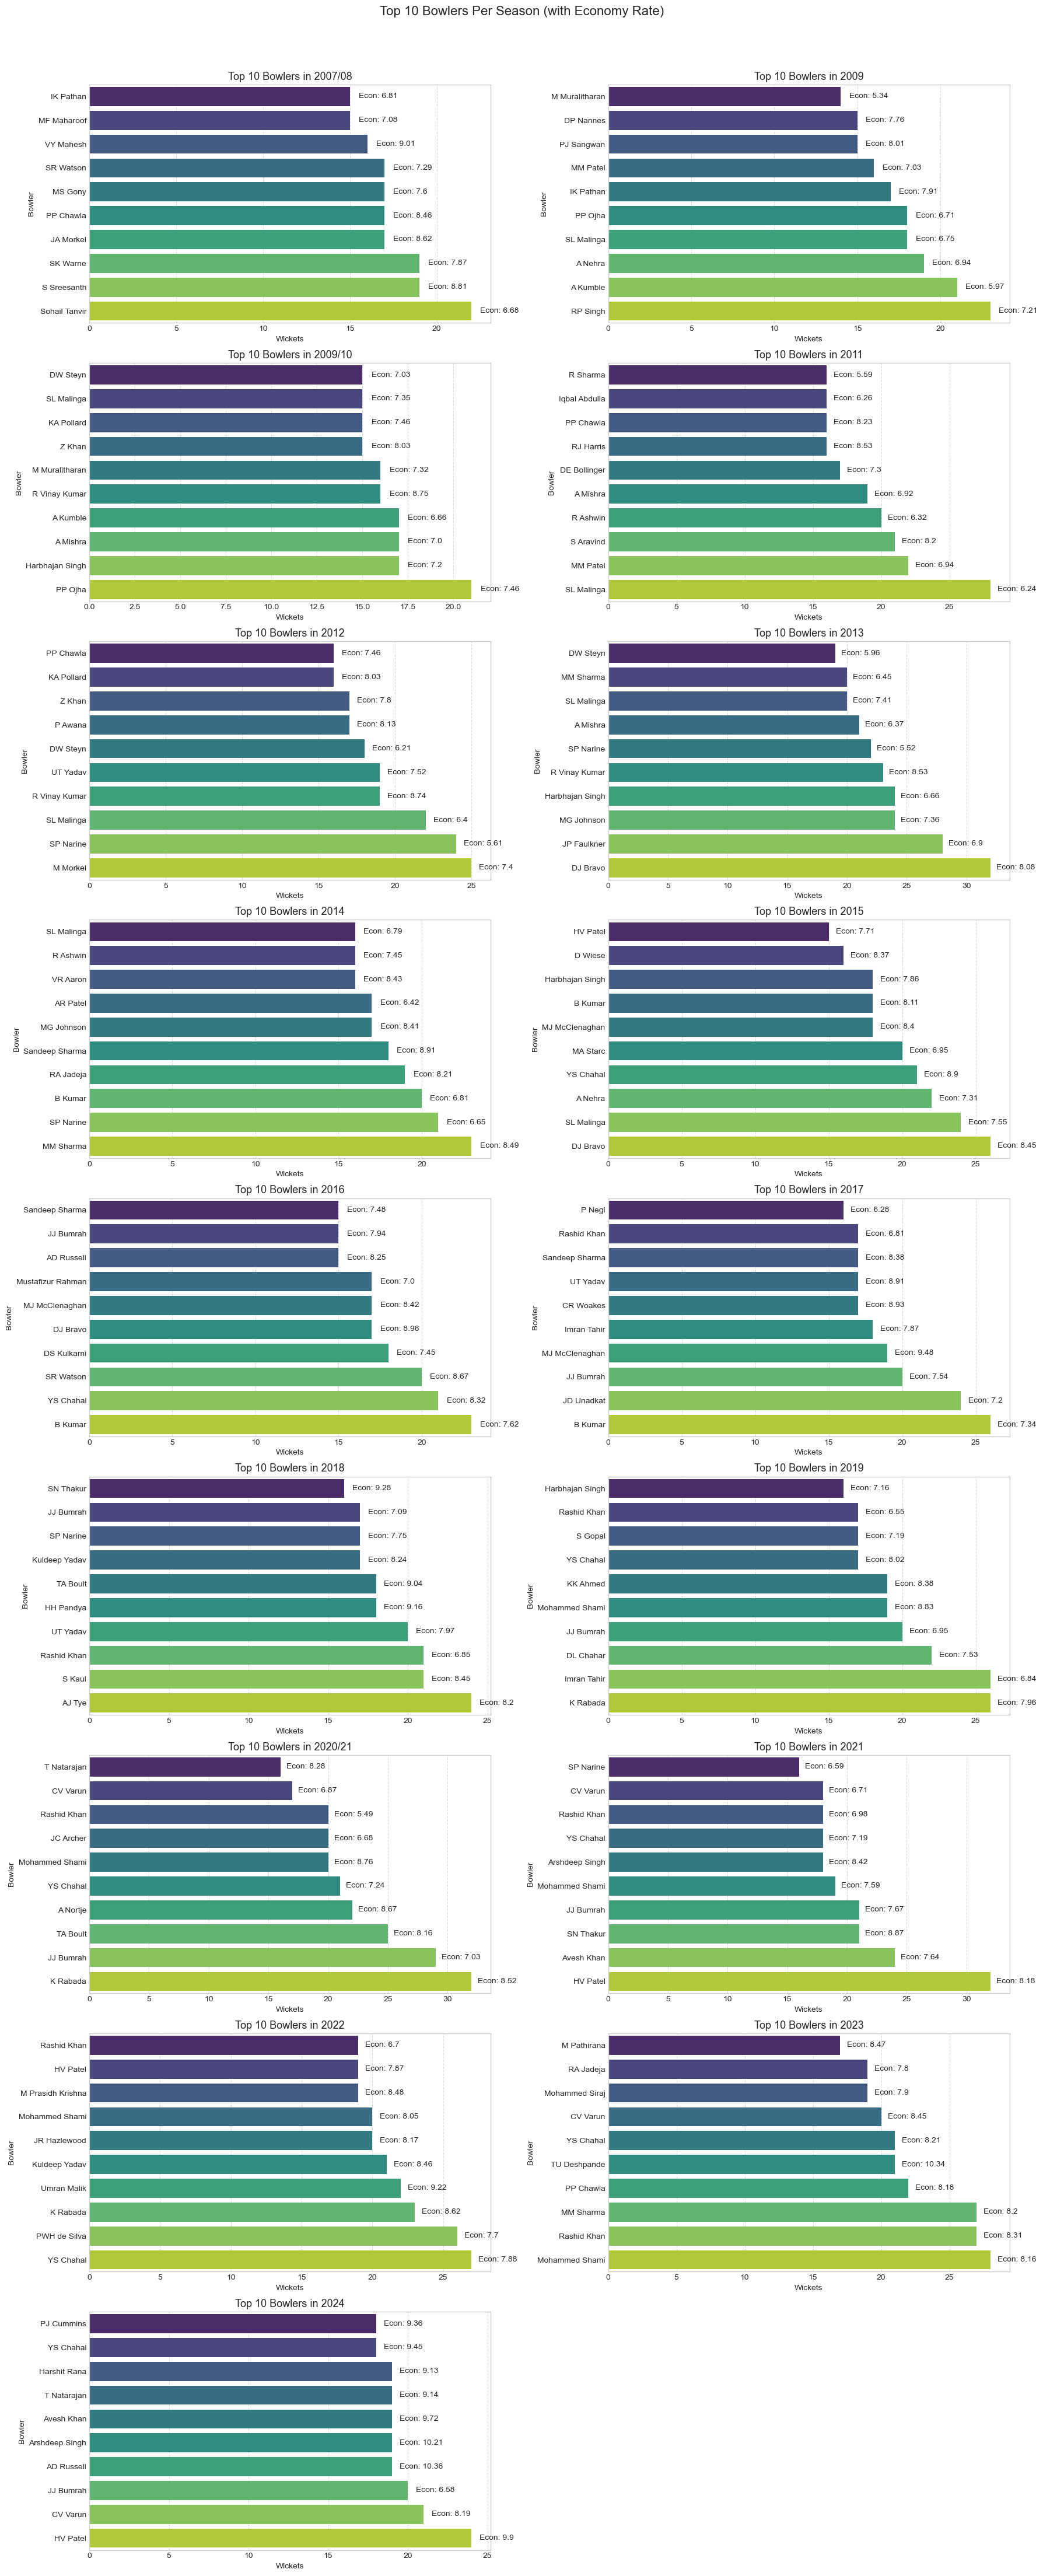

C:\Users\SUBHAYAN\AppData\Local\Temp\ipykernel_25452\4148289278.py:183: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  latest_season_data['bowling_avg_plot'] = latest_season_data['bowling_avg'].fillna(100)  # Replace NaN with high value


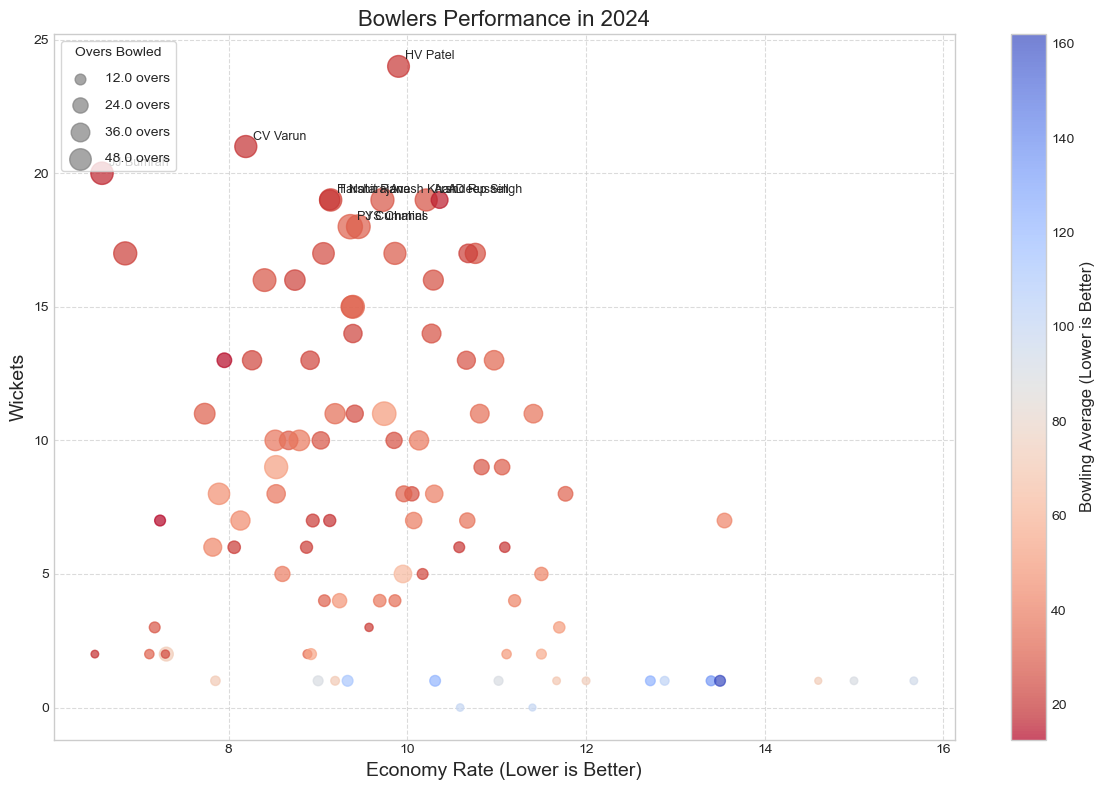

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the data
matches_df = pd.read_csv('cleaned_ipl_matches_v2.csv')
deliveries_df = pd.read_csv('cleaned_ipl_deliveries_v2.csv')

# Print first few rows of each dataframe to inspect structure
print("First 5 rows of matches_df:")
print(matches_df.head())
print("\nColumns in matches_df:", matches_df.columns.tolist())

print("\nFirst 5 rows of deliveries_df:")
print(deliveries_df.head())
print("\nColumns in deliveries_df:", deliveries_df.columns.tolist())

# Merge deliveries with matches to get season information
deliveries_with_season = pd.merge(
    deliveries_df,
    matches_df[['id', 'season']],
    left_on='match_id',
    right_on='id'
)

print("\nMerged data first 5 rows:")
print(deliveries_with_season.head())

# Check for wicket information - identify how wickets are recorded
print("\nUnique values in is_wicket column:", deliveries_with_season['is_wicket'].unique())
if 'dismissal_kind' in deliveries_with_season.columns:
    print("\nUnique values in dismissal_kind column:", deliveries_with_season['dismissal_kind'].unique())

# Count wickets taken by each bowler in each season (excluding run outs)
wickets_df = deliveries_with_season[
    (deliveries_with_season['is_wicket'] == 1) & 
    (~deliveries_with_season['dismissal_kind'].isin(['run out', 'retired hurt', 'obstructing the field', 'retired out']))
]

print("\nWickets dataframe shape:", wickets_df.shape)
print("Sample of wickets dataframe:", wickets_df.head() if not wickets_df.empty else "Empty")

bowler_wickets_per_season = wickets_df.groupby(['season', 'bowler']).size().reset_index(name='wickets')

# Check for extras column naming
print("\nChecking extras columns:")
extras_col = None
if 'extras_type' in deliveries_with_season.columns:
    extras_col = 'extras_type'
elif 'extras_type' in deliveries_df.columns:
    extras_col = 'extras_type'
else:
    print("No extras_type column found. Checking alternatives...")
    for col in deliveries_with_season.columns:
        if 'extra' in col.lower():
            print(f"Found potential extras column: {col}")
            extras_col = col
            break

print(f"Using {extras_col} for extras information")

# Calculate economy rate for each bowler in each season
# Group by season and bowler, then count legal deliveries and total runs conceded
bowler_stats = []

for season in sorted(deliveries_with_season['season'].unique()):
    season_deliveries = deliveries_with_season[deliveries_with_season['season'] == season]
    
    # Group by bowler
    for bowler in season_deliveries['bowler'].unique():
        bowler_deliveries = season_deliveries[season_deliveries['bowler'] == bowler]
        
        # Count legal deliveries (excluding wides and no balls)
        if extras_col:
            # Check the values in the extras column
            print(f"Unique values in {extras_col}:", bowler_deliveries[extras_col].unique())
            legal_balls = len(bowler_deliveries[~bowler_deliveries[extras_col].isin(['wides', 'noballs'])])
        else:
            # If no extras column, use all deliveries as legal (approximation)
            legal_balls = len(bowler_deliveries)
        
        # Calculate total runs conceded (including extras)
        runs_conceded = bowler_deliveries['total_runs'].sum()
        
        # Calculate wickets
        wickets = len(bowler_deliveries[
            (bowler_deliveries['is_wicket'] == 1) & 
            (~bowler_deliveries['dismissal_kind'].isin(['run out', 'retired hurt', 'obstructing the field', 'retired out']))
        ])
        
        # Calculate economy rate (runs per over)
        economy_rate = (runs_conceded / (legal_balls / 6)) if legal_balls > 0 else 0
        
        # Calculate bowling average (runs per wicket)
        bowling_avg = runs_conceded / wickets if wickets > 0 else float('inf')
        
        # Calculate strike rate (balls per wicket)
        strike_rate = legal_balls / wickets if wickets > 0 else float('inf')
        
        # Minimum deliveries to qualify (lowered threshold for testing)
        if legal_balls >= 30:  # Lowered from 60 for testing
            bowler_stats.append({
                'season': season,
                'bowler': bowler,
                'wickets': wickets,
                'economy_rate': round(economy_rate, 2),
                'bowling_avg': round(bowling_avg, 2) if bowling_avg != float('inf') else None,
                'strike_rate': round(strike_rate, 2) if strike_rate != float('inf') else None,
                'overs_bowled': round(legal_balls / 6, 1)
            })

# Create the DataFrame
bowler_stats_df = pd.DataFrame(bowler_stats)

# Check if the DataFrame is empty
if bowler_stats_df.empty:
    print("WARNING: bowler_stats_df is empty! Check data filtering conditions.")
else:
    print("bowler_stats_df shape:", bowler_stats_df.shape)
    print("First 5 rows of bowler_stats_df:")
    print(bowler_stats_df.head())
    
    # Get top 10 bowlers per season based on wickets
    top_bowlers_per_season = bowler_stats_df.sort_values(
        by=['season', 'wickets', 'economy_rate'], 
        ascending=[True, False, True]
    ).groupby('season').head(10)
    
    print("Top bowlers per season shape:", top_bowlers_per_season.shape)
    
    # Create faceted plots showing top 10 bowlers for each season
    seasons = sorted(top_bowlers_per_season['season'].unique())
    
    # Create subplot for each season with 2 columns
    n_seasons = len(seasons)
    n_cols = 2
    n_rows = (n_seasons + n_cols - 1) // n_cols  # Ceiling division
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 5 * n_rows))
    if n_rows == 1 and n_cols == 1:
        axes = [axes]
    elif n_rows == 1 or n_cols == 1:
        axes = axes.flatten() 
    else:
        axes = axes.flatten()
        
    for i, season in enumerate(seasons):
        if i < len(axes):  # Ensure we don't go out of bounds
            ax = axes[i]
            season_data = top_bowlers_per_season[top_bowlers_per_season['season'] == season].sort_values('wickets', ascending=True).tail(10)
            
            # Create horizontal bar chart
            bars = sns.barplot(y='bowler', x='wickets', data=season_data, ax=ax, palette='viridis')
            
            # Add economy rate as text
            for j, (_, row) in enumerate(season_data.iterrows()):
                ax.text(row['wickets'] + 0.5, j, f"Econ: {row['economy_rate']}", va='center')
            
            ax.set_title(f'Top 10 Bowlers in {season}', fontsize=13)
            ax.set_xlabel('Wickets')
            ax.set_ylabel('Bowler')
            
            # Add grid lines
            ax.grid(axis='x', linestyle='--', alpha=0.7)
    
    # Hide any unused subplots
    for j in range(i + 1, len(axes)):
        axes[j].set_visible(False)
    
    plt.tight_layout()
    plt.subplots_adjust(top=0.95)
    fig.suptitle('Top 10 Bowlers Per Season (with Economy Rate)', fontsize=16)
    plt.savefig('top_bowlers_per_season.png')  # Save figure for inspection
    plt.show()
    
    # Create a scatter plot of wickets vs economy rate for the latest season
    latest_season = max(bowler_stats_df['season'])
    latest_season_data = bowler_stats_df[bowler_stats_df['season'] == latest_season]
    
    plt.figure(figsize=(12, 8))
    # Handle null values in bowling_avg
    latest_season_data['bowling_avg_plot'] = latest_season_data['bowling_avg'].fillna(100)  # Replace NaN with high value
    
    scatter = plt.scatter(x='economy_rate', y='wickets', data=latest_season_data, 
                         s=latest_season_data['overs_bowled']*5, alpha=0.7, 
                         c=latest_season_data['bowling_avg_plot'], cmap='coolwarm_r')
    
    # Add names for top performers
    for _, row in latest_season_data.nlargest(10, 'wickets').iterrows():
        plt.annotate(row['bowler'], 
                    xy=(row['economy_rate'], row['wickets']),
                    xytext=(5, 5),
                    textcoords='offset points',
                    fontsize=9)
    
    plt.title(f'Bowlers Performance in {latest_season}', fontsize=16)
    plt.xlabel('Economy Rate (Lower is Better)', fontsize=14)
    plt.ylabel('Wickets', fontsize=14)
    plt.grid(linestyle='--', alpha=0.7)
    
    # Add color bar for bowling average
    cbar = plt.colorbar(scatter)
    cbar.set_label('Bowling Average (Lower is Better)', fontsize=12)
    
    # Add legend for circle size
    sizes = [60, 120, 180, 240]
    overs = [sizes[i]/5 for i in range(len(sizes))]
    labels = [f'{oval} overs' for oval in overs]
    leg = plt.legend(handles=[plt.scatter([], [], s=sizes[i], color='gray', alpha=0.7) for i in range(len(sizes))],
               labels=labels,
               title="Overs Bowled",
               loc="upper left",
               scatterpoints=1,
               frameon=True,
               labelspacing=1)
    
    plt.tight_layout()
    plt.savefig('bowlers_performance_latest_season.png')  # Save figure for inspection
    plt.show()